# Studi Kasus Perceptron (Tuning Hyperparameter pada Dataset Iris)

Anda diminta untuk mengembangkan sebuah classifier untuk dataset iris. Untuk mempermudah proses klasifikasi, dataset iris yang anda gunakan hanya terdiri dari kelas Virginica dan Versicolor

# Data Loading & Basic Analysis

In [31]:
import numpy as np
import pandas as pd

df = pd.read_csv('iris.csv')

In [32]:
df.head()

sepal.length  sepal.width  petal.length  petal.width     variety
0           7.0          3.2           4.7          1.4  Versicolor
1           6.4          3.2           4.5          1.5  Versicolor
2           6.9          3.1           4.9          1.5  Versicolor
3           5.5          2.3           4.0          1.3  Versicolor
4           6.5          2.8           4.6          1.5  Versicolor

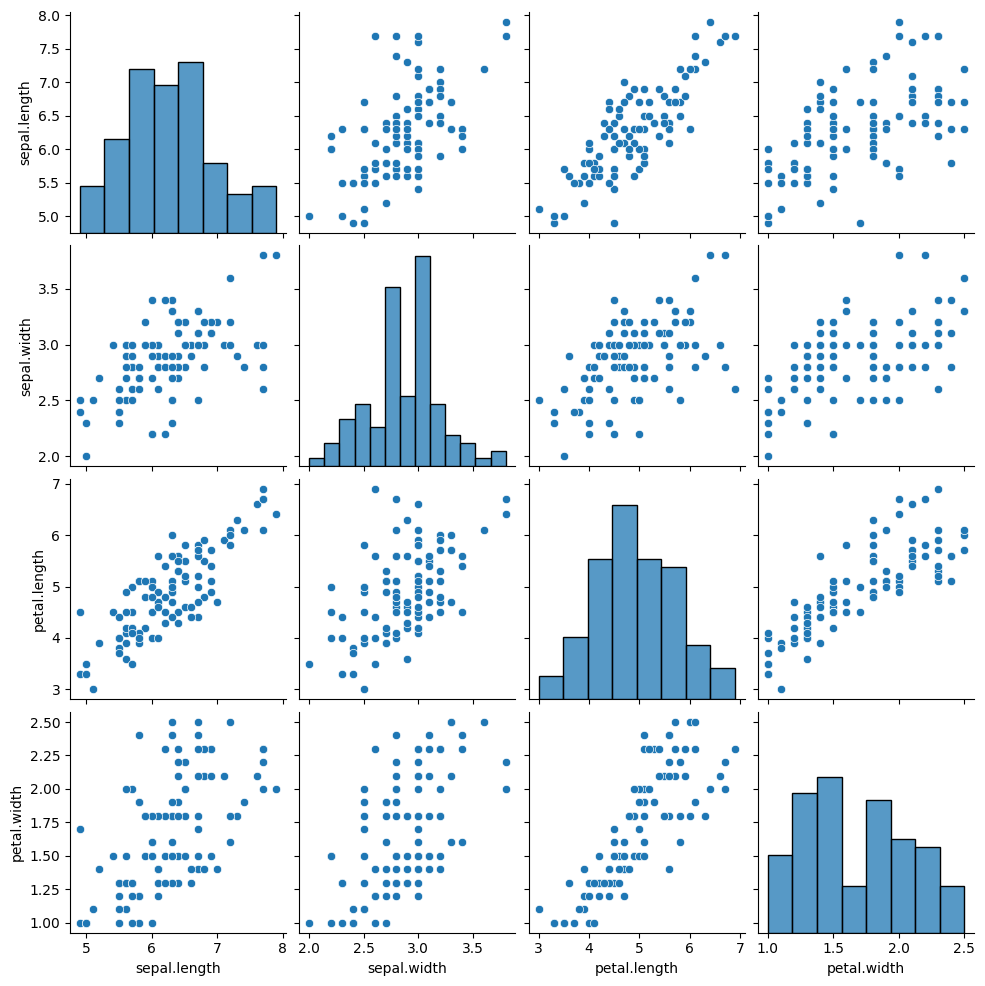

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df.drop('variety', axis=1))

In [53]:
from sklearn.model_selection import train_test_split

X = df.drop('variety', axis=1)
X = X.to_numpy()
y = df['variety'].to_numpy()
c = {'Virginica': -1, 'Versicolor': 1}
y = [c[i] for i in y]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Implementasi Perceptron

Dari data diatas, buatlah sebuah model single-layer perceptron untuk mengklasifikasikan kedua model. Kode dapat menggunakan dari praktikum ataupun membuat sendiri

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

In [55]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

In [56]:
def percep_fit(X, target, th=0, a=1, max_epoch=-1, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1

    if verbose:
      print('\nEpoch', epoch)
    for r, row in enumerate(X):
      y_in = np.dot(row, w)
      y = percep_step(y_in, th)

      if y != target[r]:
        stop = False
        w = [w[i] + a * target[r] * row[i] for i in range(len(row))]

      if verbose:
        print('Bobot:', w)
      if draw:
        plot(line(w, th), line(w, -th), X, target)

  return w, epoch

In [57]:
def percep_predict(X, w, th=0):
  Y = []

  for x in X:
    y_in = w[0] + np.dot(x, w[1:])
    y = percep_step(y_in, th)

    Y.append(y)
  return Y

In [58]:
def calc_accuracy(a, b):
  s = [1 if a[i] == b[i] else 0 for i in range(len(a))]

  return sum(s) / len(a)

In [71]:
th = 0.2
w, epoch = percep_fit(X_train, y_train, th,  verbose=True, draw=False)
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

Streaming output truncated to the last 5000 lines.
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30000000000081, 57.70000000000056, -99.99999999999895, -129.39999999999995]
Bobot: [88.0, 71.30

KeyboardInterrupt: 

## Analisis

1. Dari pengecekan menggunakan pairplot diatas, apakah menurut anda perceptron cocok untuk kasus Iris? Mengapa?
2. Ubahlah nilai learning rate menjadi sangat tinggi dan sangat rendah (cth. 10000 dan 0.0000001). Apa yang terjadi pada kedua kasus tersebut?
3. Ubahlah nilai epoch menjadi sangat tinggi dan sangat rendah (cth. 1000000 dan 1). Apa yang terjadi pada kedua kasus tersebut?
4. Dari kedua hyperparameter diatas, apa pengaruh setiap hyperparameter tersebut?
5. Menurut pendapat anda, tahapan apakah yang dapat dilakukan untuk menentukan nilai learning rate dan epoch yang sesuai

**JAWAB**

1. Tidak, pada saat proses training dan testing, mustahil untuk mencapai konvergensi dikarenakan pada dataset iris, terdapat overlapping pada kelas virginica dan versicolor. Sehingga mustahil untuk membagi kedua kelas tersebut dengan garis yang linear

2. Saat learning rate terlalu tinggi: 10000, model akan melompat-lompat secara drastis dan bisa gagal konvergen, menghasilkan performa buruk atau bahkan tidak stabil. Sebaliknya, jika terlalu rendah: 0.0000001, pembaruan bobot akan sangat lambat, dan proses pelatihan bisa memakan waktu lama / terjebak di local minima.

3.  Saat jumlah epoch terlalu sedikit: 1, model belum sempat belajar cukup banyak dari data dan mengalami underfitting. jika epoch terlalu banyak: 1 juta, model mengalami overfitting, di mana ia terlalu menyesuaikan diri dengan data pelatihan dan kurang mampu menggeneralisasi pada data baru. Sehingga dihasilkan akurasi 1.

4. Learning rate mengatur seberapa besar pembaruan bobot pada setiap iterasi pelatihan. Jika terlalu tinggi, model bisa melompat-lompat dari satu solusi ke solusi lain, gagal mencapai konvergensi. Sebaliknya, learning rate yang terlalu rendah membuat pelatihan sangat lambat dan berisiko terjebak di local minima. Sementara itu, epoch menentukan berapa kali model melihat seluruh dataset. Terlalu sedikit epoch, menyebabkan underfitting, di mana model belum cukup belajar dari data. Sebaliknya, terlalu banyak epoch, dapat menyebabkan overfitting, di mana model bekerja baik pada data pelatihan, tetapi buruk dalam data baru.

5. Dengan melakukan eksperimen terhadap hyperparameter, atau bisa disebut dengan tuning hyperparameter. Tuning hyperparameter biasanya dengan pendekatan gridsearch atau bisa juga randomsearch. Pendekatan ini dilakukan untuk melakukan pengujian berbagai kombinasi hyperparameter untuk menghasilkan hasil terbaik


Kode untuk nomer 2 dan 3

In [65]:
def percep_fit2(X, target, th=0, a=0, max_epoch=0, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0

  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1

    if verbose:
      print('\nEpoch', epoch)
    for r, row in enumerate(X):
      y_in = np.dot(row, w)
      y = percep_step(y_in, th)

      if y != target[r]:
        stop = False
        w = [w[i] + a * target[r] * row[i] for i in range(len(row))]

      if verbose:
        print('Bobot:', w)
      if draw:
        plot(line(w, th), line(w, -th), X, target)

  return w, epoch




Epoch 1
Bobot: [-1000000.0, -6400000.0, -2700000.0, -5300000.0, -1900000.0]


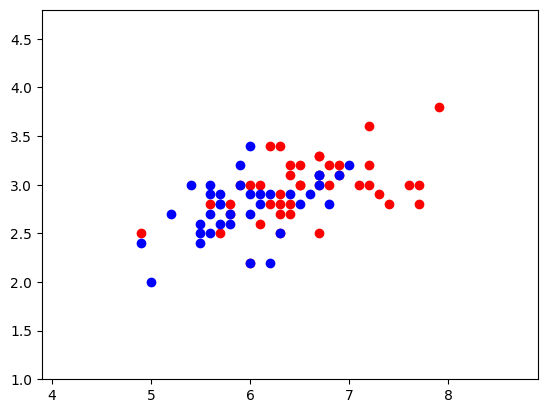

Bobot: [0.0, -200000.0, 200000.0, -1000000.0, -600000.0]


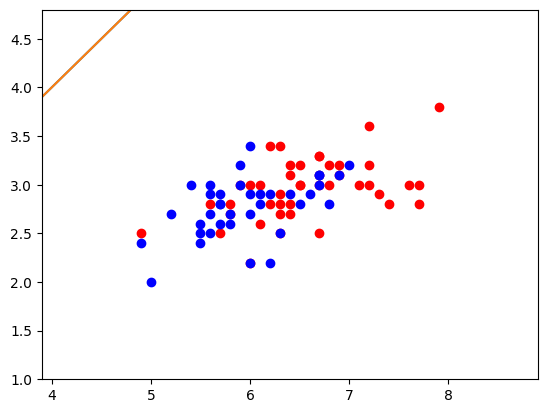

Bobot: [0.0, -200000.0, 200000.0, -1000000.0, -600000.0]


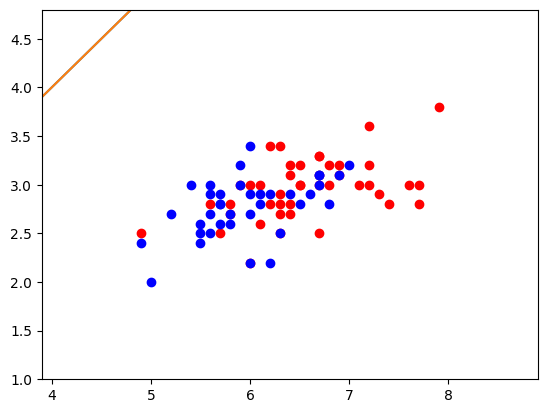

Bobot: [0.0, -200000.0, 200000.0, -1000000.0, -600000.0]


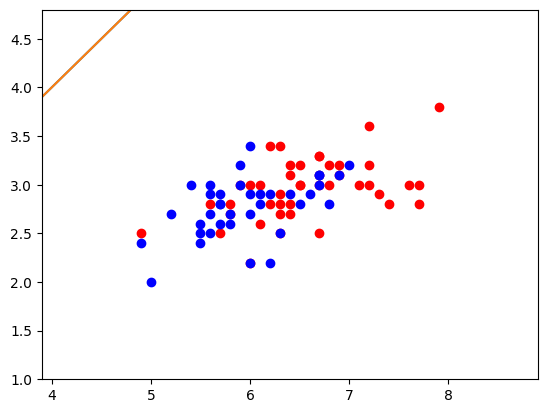

Bobot: [1000000.0, 6700000.0, 3300000.0, 3900000.0, 900000.0]


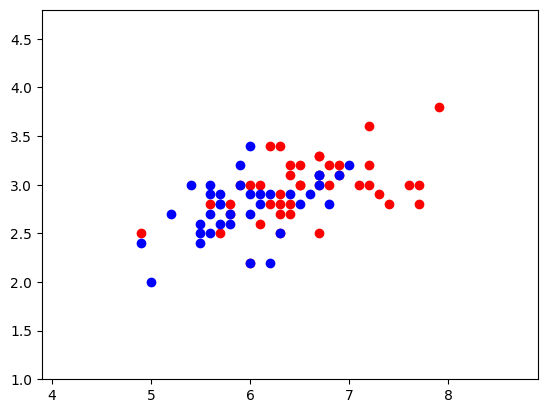

Bobot: [1000000.0, 6700000.0, 3300000.0, 3900000.0, 900000.0]


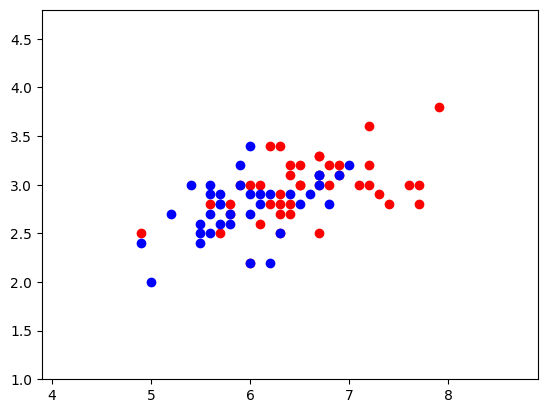

Bobot: [0.0, 300000.0, 500000.0, -1700000.0, -1200000.0]


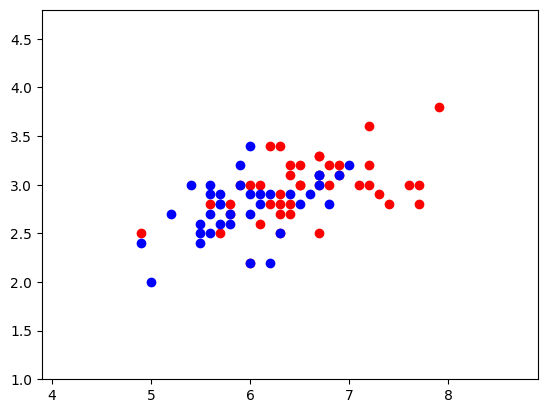

Bobot: [0.0, 300000.0, 500000.0, -1700000.0, -1200000.0]


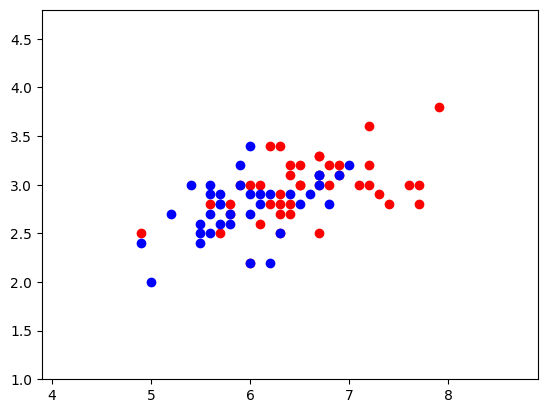

Bobot: [0.0, 300000.0, 500000.0, -1700000.0, -1200000.0]


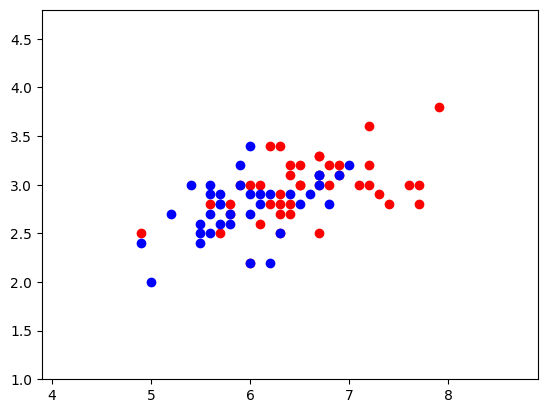

Bobot: [0.0, 300000.0, 500000.0, -1700000.0, -1200000.0]


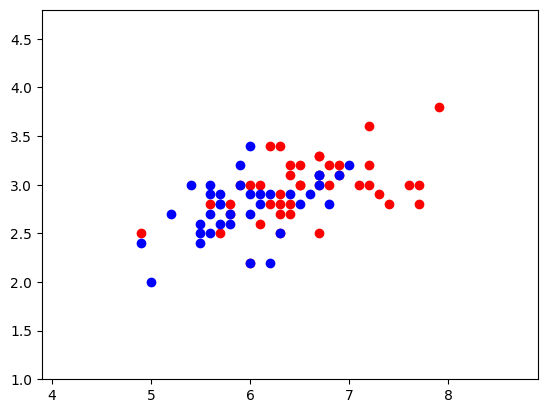

Bobot: [0.0, 300000.0, 500000.0, -1700000.0, -1200000.0]


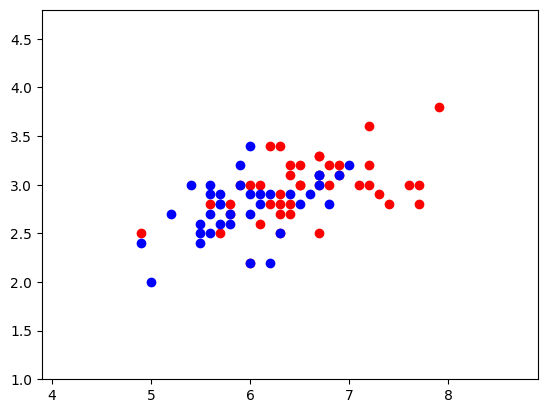

Bobot: [1000000.0, 5900000.0, 3400000.0, 1900000.0, 100000.0]


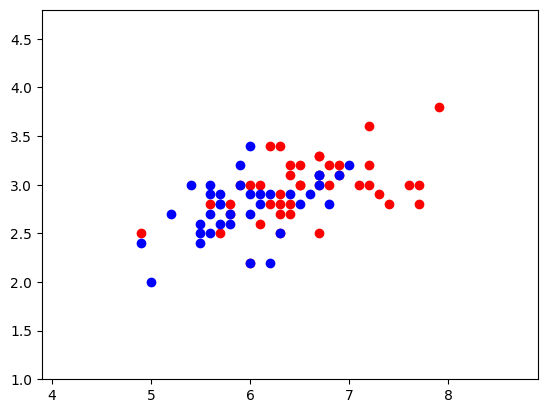

Bobot: [1000000.0, 5900000.0, 3400000.0, 1900000.0, 100000.0]


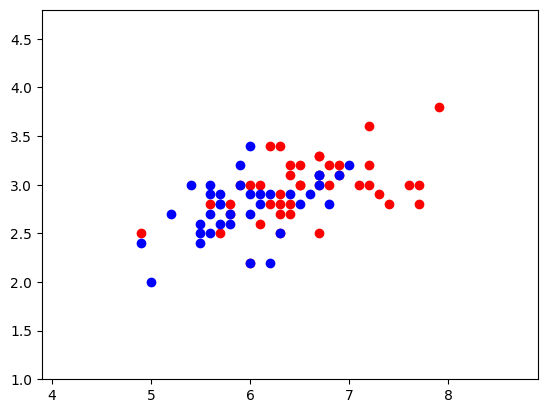

Bobot: [1000000.0, 5900000.0, 3400000.0, 1900000.0, 100000.0]


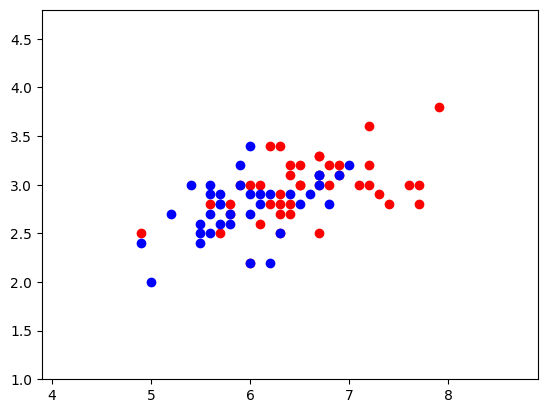

Bobot: [1000000.0, 5900000.0, 3400000.0, 1900000.0, 100000.0]


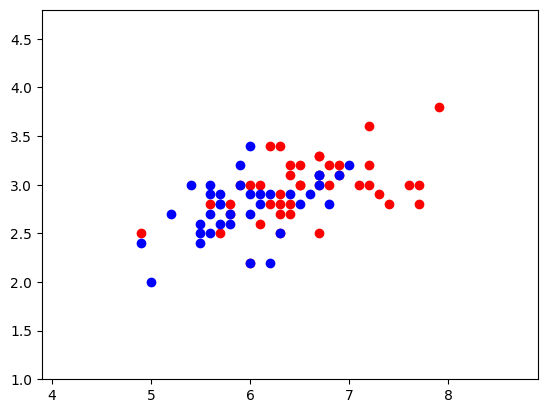

Bobot: [0.0, 300000.0, 600000.0, -3000000.0, -1900000.0]


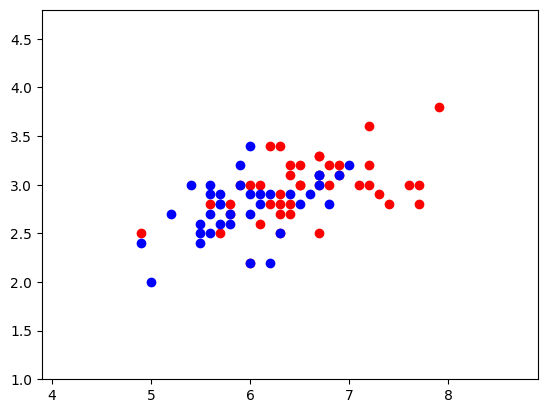

Bobot: [1000000.0, 7000000.0, 3600000.0, 2000000.0, -200000.0]


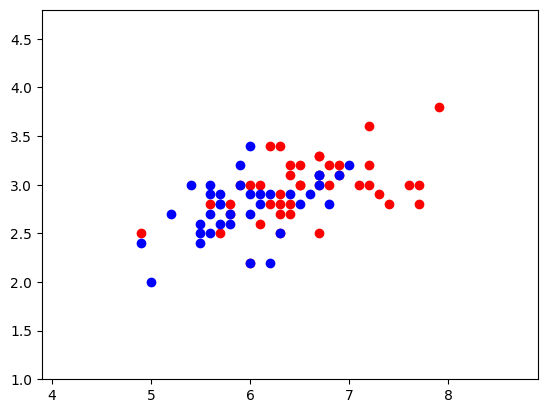

Bobot: [1000000.0, 7000000.0, 3600000.0, 2000000.0, -200000.0]


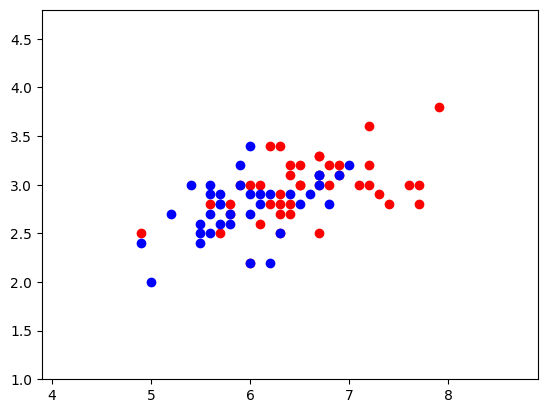

Bobot: [0.0, 600000.0, 400000.0, -3300000.0, -2500000.0]


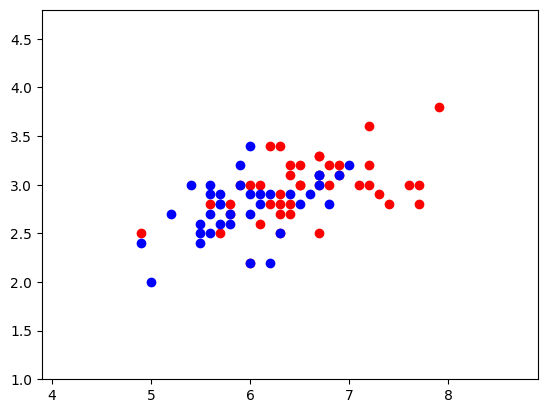

Bobot: [1000000.0, 6100000.0, 2800000.0, 500000.0, -1400000.0]


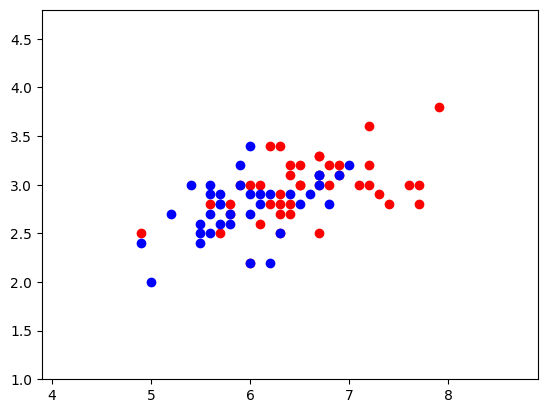

Bobot: [1000000.0, 6100000.0, 2800000.0, 500000.0, -1400000.0]


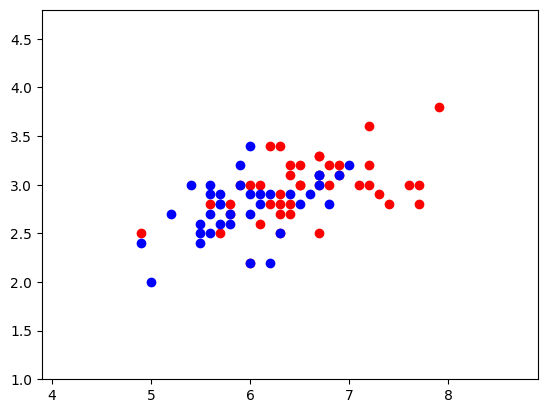

Bobot: [0.0, -600000.0, -500000.0, -5200000.0, -3500000.0]


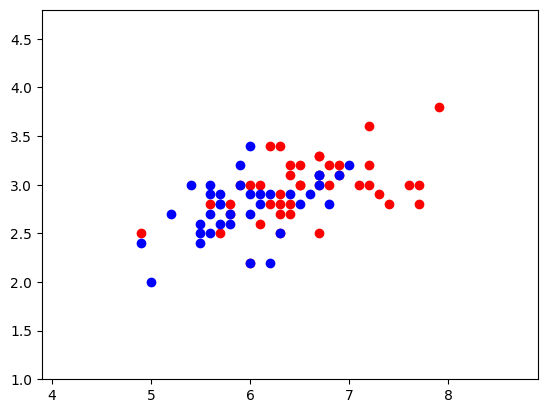

Bobot: [0.0, -600000.0, -500000.0, -5200000.0, -3500000.0]


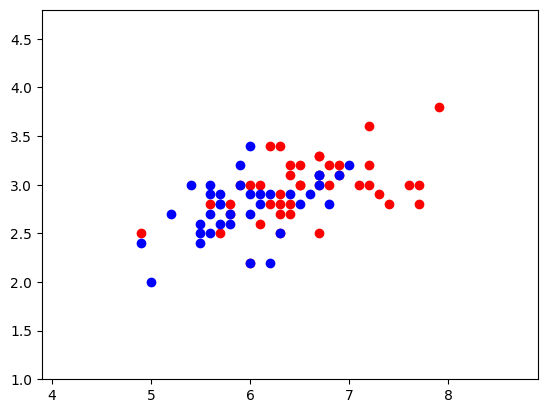

Bobot: [1000000.0, 5800000.0, 2400000.0, -900000.0, -2200000.0]


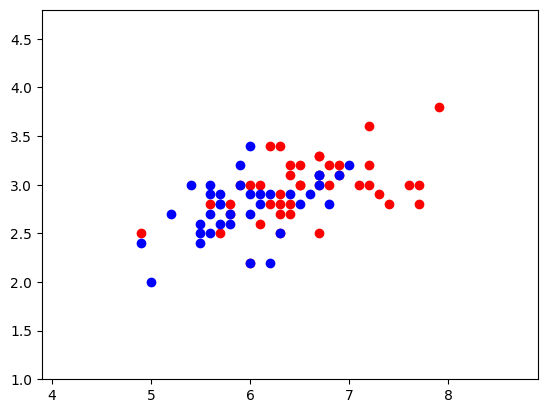

Bobot: [0.0, -1400000.0, -600000.0, -6700000.0, -3800000.0]


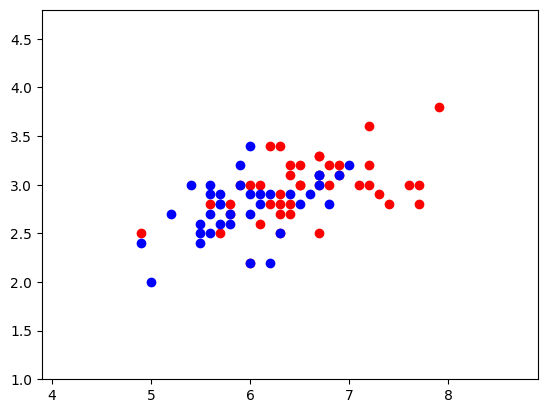

Bobot: [1000000.0, 4600000.0, 2100000.0, -1600000.0, -2200000.0]


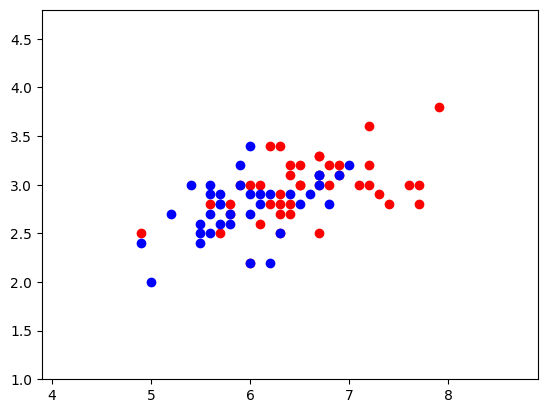

Bobot: [0.0, -1700000.0, -800000.0, -7200000.0, -4000000.0]


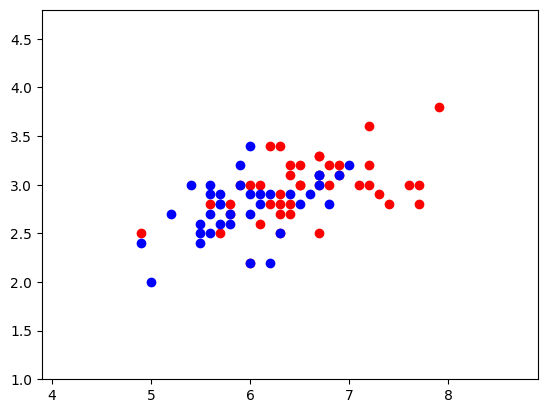

Bobot: [0.0, -1700000.0, -800000.0, -7200000.0, -4000000.0]


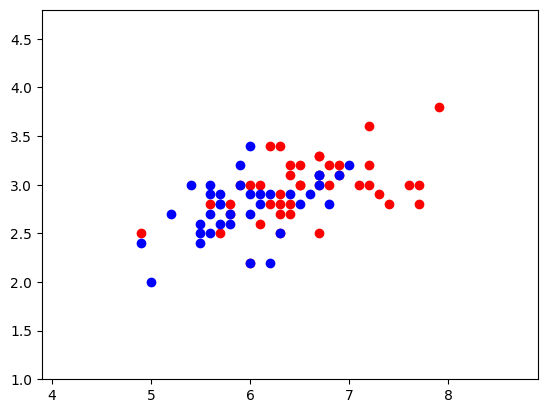

Bobot: [1000000.0, 4100000.0, 1900000.0, -3100000.0000000005, -3000000.0]


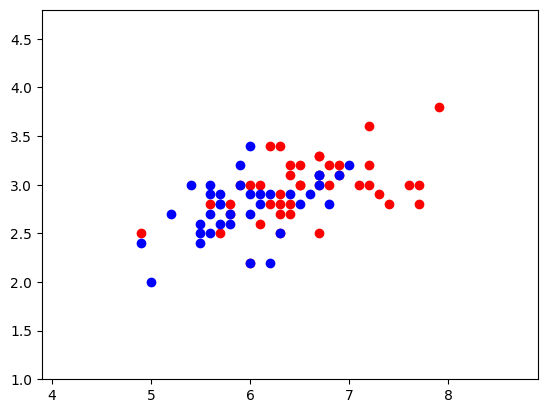

Bobot: [0.0, -2200000.0, -900000.0, -8200000.0, -4500000.0]


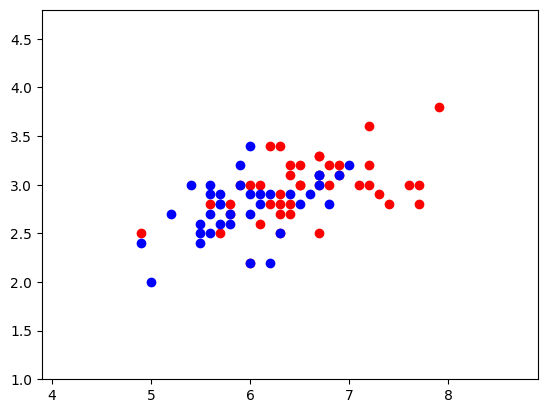

Bobot: [1000000.0, 3600000.0, 1700000.0, -4200000.0, -3300000.0]


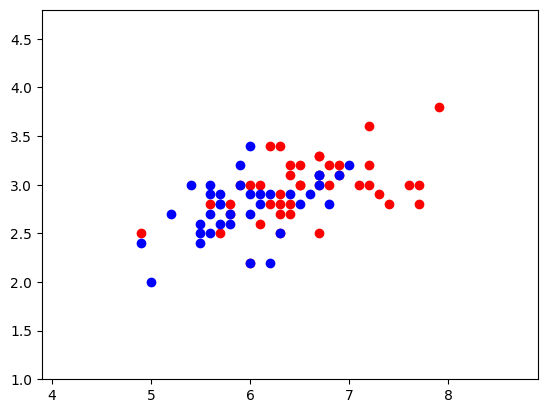

Bobot: [1000000.0, 3600000.0, 1700000.0, -4200000.0, -3300000.0]


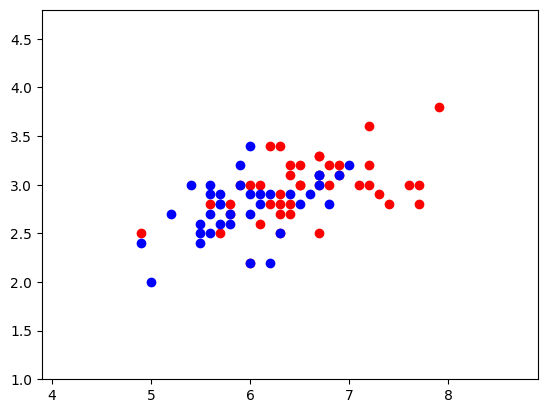

Bobot: [0.0, -2600000.0, -1100000.0, -9000000.0, -5100000.0]


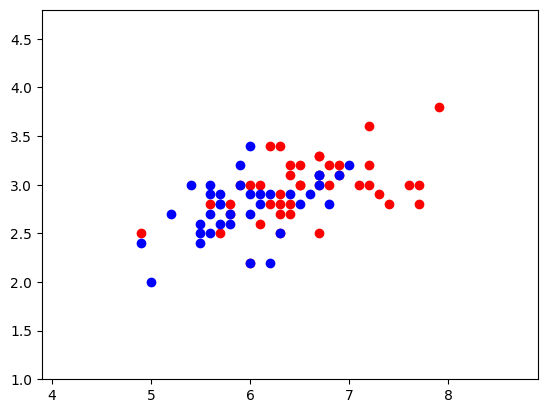

Bobot: [1000000.0, 4100000.0, 2000000.0, -4600000.0, -3700000.0]


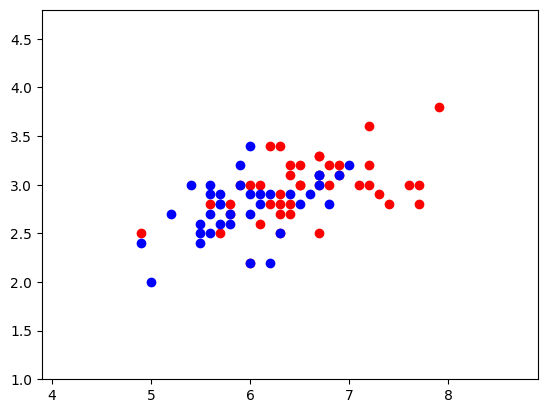

Bobot: [0.0, -2200000.0, -500000.0, -9600000.0, -5600000.0]


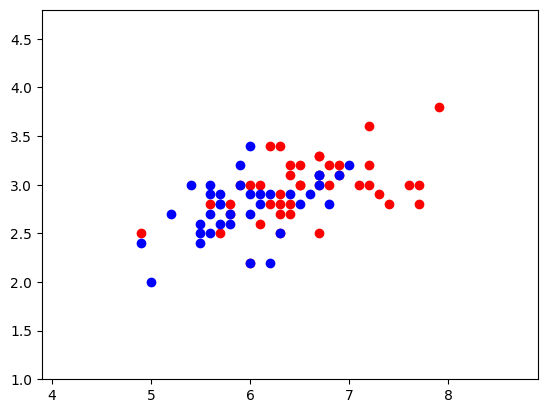

Bobot: [0.0, -2200000.0, -500000.0, -9600000.0, -5600000.0]


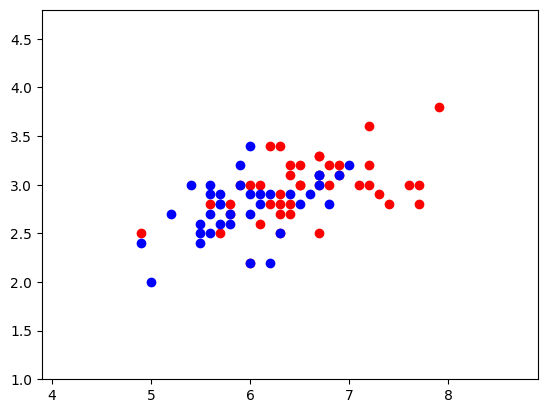

Bobot: [0.0, -2200000.0, -500000.0, -9600000.0, -5600000.0]


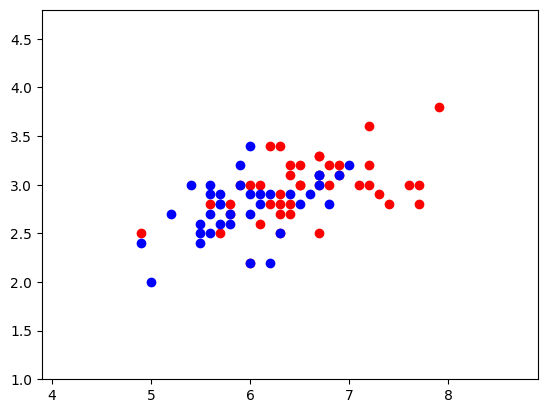

Bobot: [1000000.0, 4000000.0, 1700000.0, -5100000.0, -4100000.0]


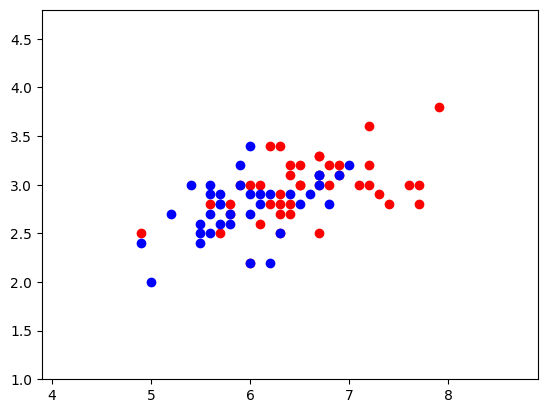

Bobot: [1000000.0, 4000000.0, 1700000.0, -5100000.0, -4100000.0]


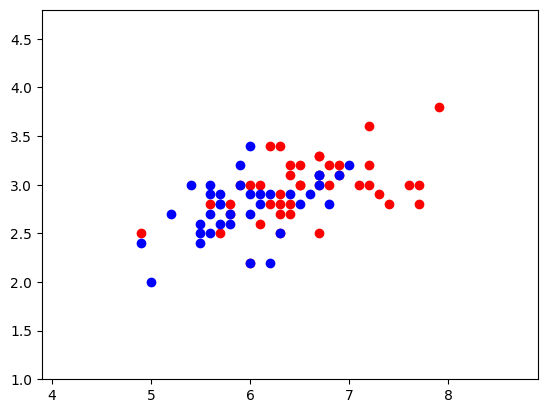

Bobot: [1000000.0, 4000000.0, 1700000.0, -5100000.0, -4100000.0]


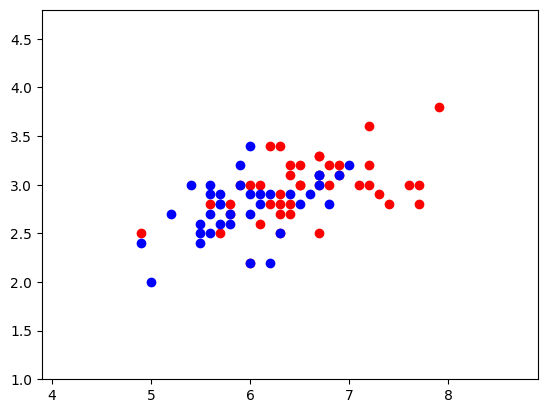

Bobot: [1000000.0, 4000000.0, 1700000.0, -5100000.0, -4100000.0]


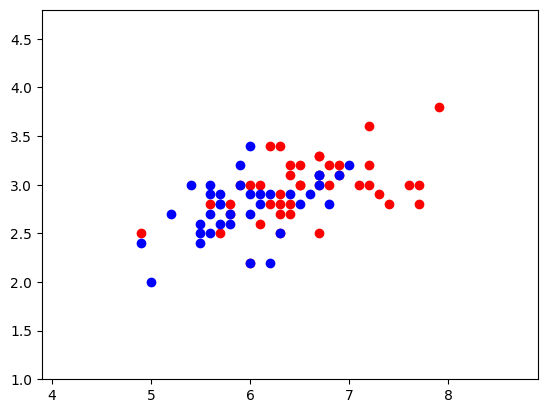

Bobot: [1000000.0, 4000000.0, 1700000.0, -5100000.0, -4100000.0]


KeyboardInterrupt: 

In [66]:
#nomor 2 dengan learning rate tinggi
th = 0.2
a = 1000000
max_epoch = -1
model, epoch = percep_fit2(X_train, y_train, th, a, max_epoch, verbose=True, draw=True)
out = percep_predict(X_test, model)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1e-07, -6.4e-07, -2.7e-07, -5.3e-07, -1.8999999999999998e-07]


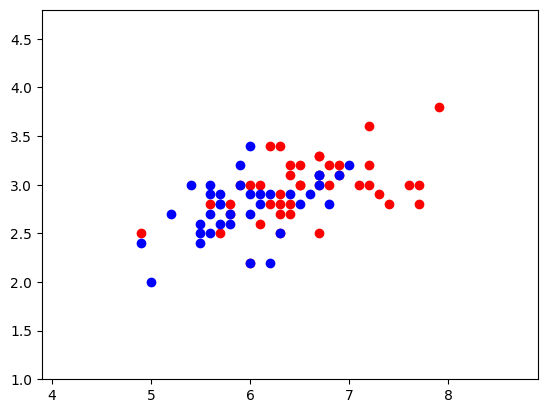

Bobot: [0.0, -2.000000000000002e-08, 1.9999999999999967e-08, -1.0000000000000005e-07, -5.999999999999998e-08]


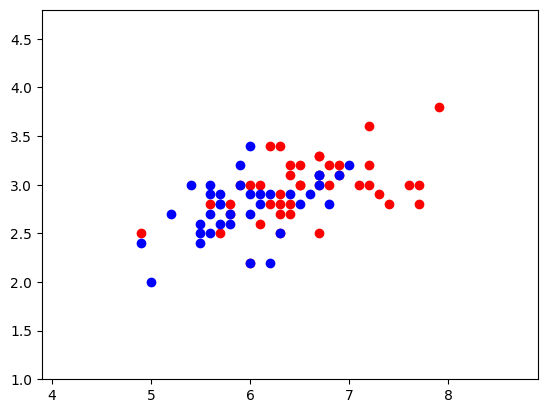

Bobot: [-1e-07, -6.699999999999999e-07, -2.8e-07, -6.800000000000001e-07, -2.7999999999999997e-07]


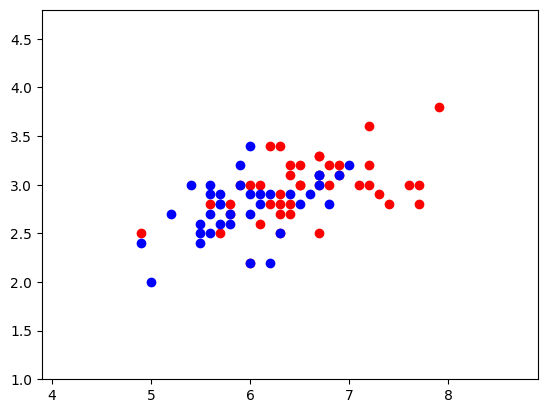

Bobot: [-2e-07, -1.4e-06, -5.7e-07, -1.3100000000000002e-06, -4.5999999999999994e-07]


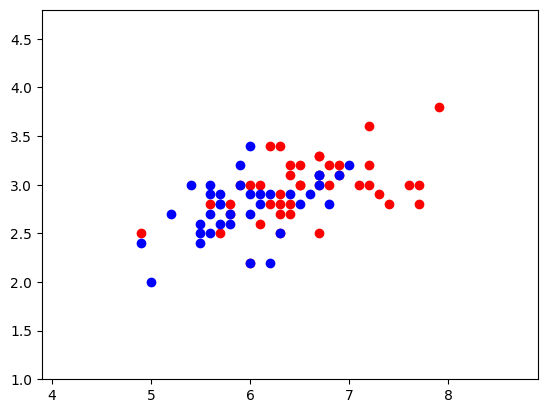

Bobot: [-1e-07, -7.1e-07, -2.6000000000000005e-07, -8.200000000000002e-07, -3.0999999999999994e-07]


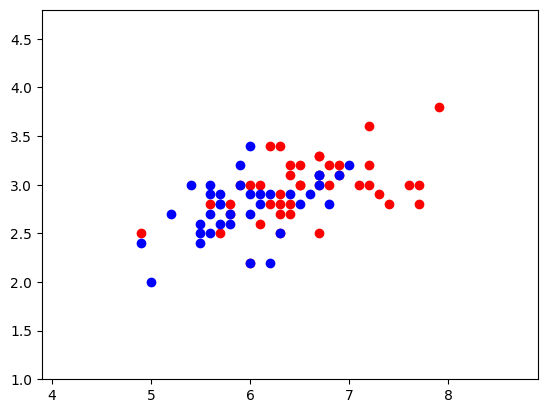

Bobot: [0.0, -1e-07, 2.9999999999999925e-08, -3.500000000000002e-07, -1.6999999999999996e-07]


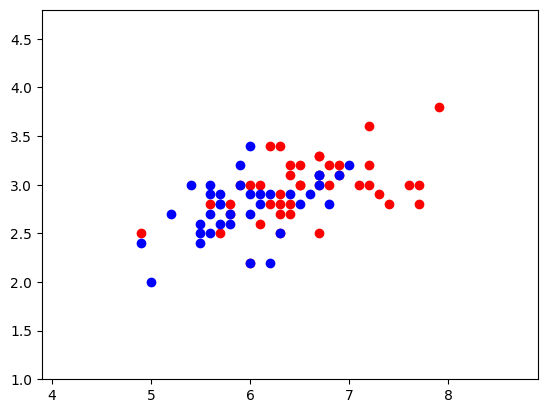

Bobot: [-1e-07, -7.4e-07, -2.5000000000000004e-07, -9.100000000000002e-07, -3.7999999999999996e-07]


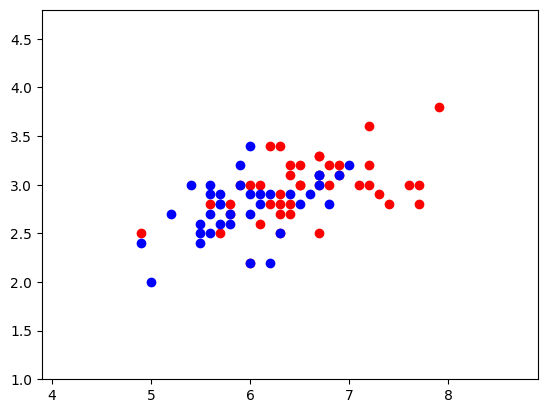

Bobot: [-2e-07, -1.41e-06, -5.000000000000001e-07, -1.4900000000000001e-06, -5.599999999999999e-07]


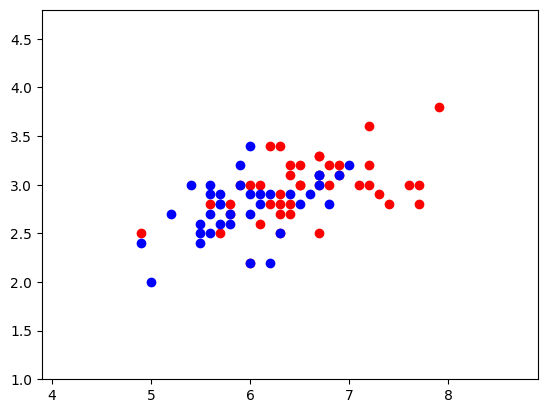

Bobot: [-3e-07, -2.02e-06, -7.600000000000001e-07, -2.05e-06, -6.999999999999999e-07]


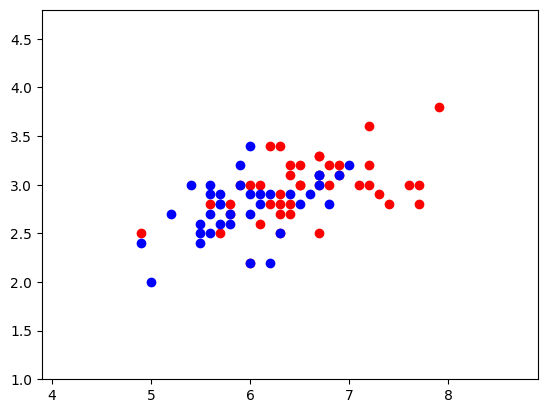

Bobot: [-4e-07, -2.7100000000000003e-06, -1.0700000000000001e-06, -2.56e-06, -9.299999999999998e-07]


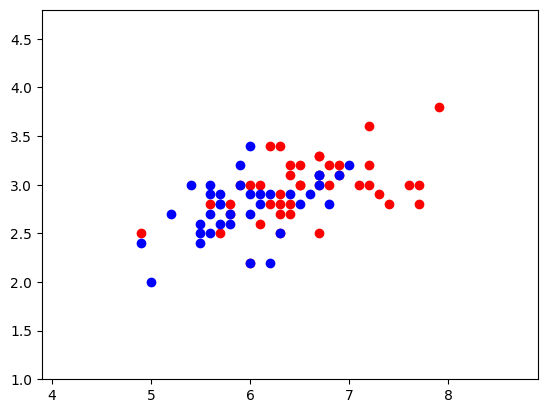

Bobot: [-5e-07, -3.34e-06, -1.41e-06, -3.1199999999999998e-06, -1.1699999999999998e-06]


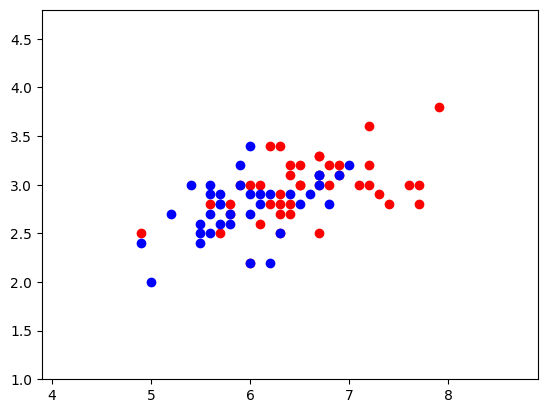

Bobot: [-4e-07, -2.7800000000000005e-06, -1.12e-06, -2.76e-06, -1.0399999999999998e-06]


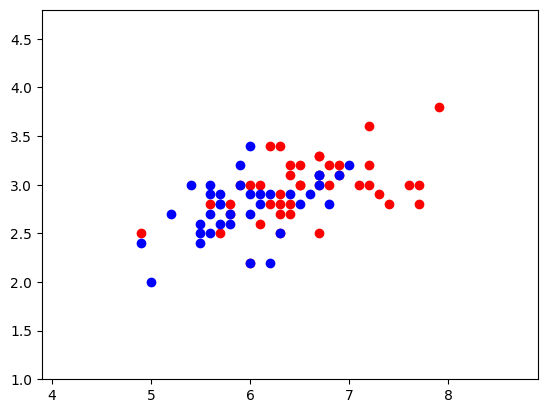

Bobot: [-3e-07, -2.1700000000000004e-06, -8.400000000000001e-07, -2.2899999999999997e-06, -9.199999999999998e-07]


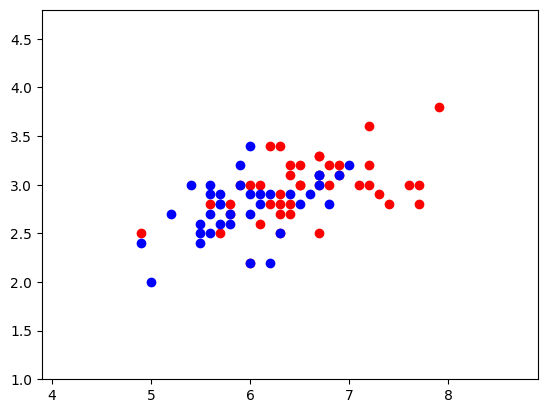

Bobot: [-2e-07, -1.4900000000000006e-06, -5.600000000000001e-07, -1.8099999999999996e-06, -7.799999999999997e-07]


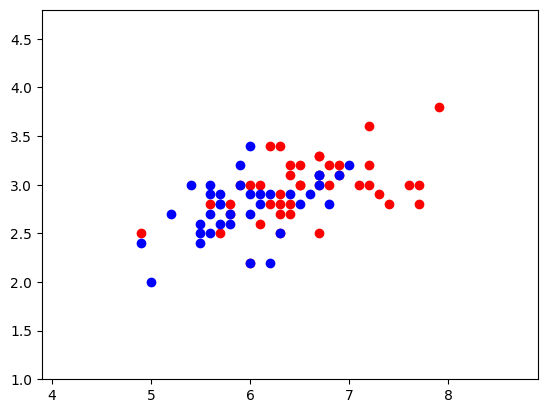

Bobot: [-1e-07, -8.600000000000006e-07, -3.1000000000000016e-07, -1.3199999999999996e-06, -6.299999999999997e-07]


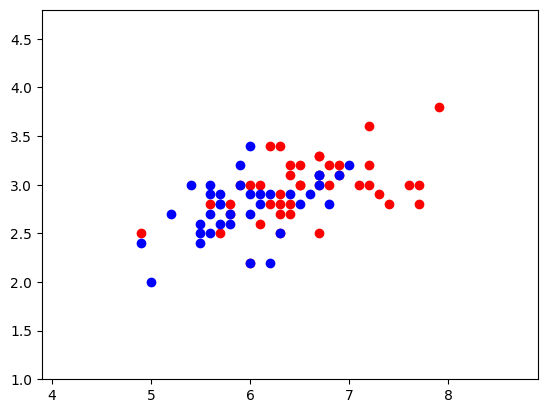

Bobot: [-2e-07, -1.4200000000000004e-06, -5.900000000000001e-07, -1.8099999999999996e-06, -8.299999999999997e-07]


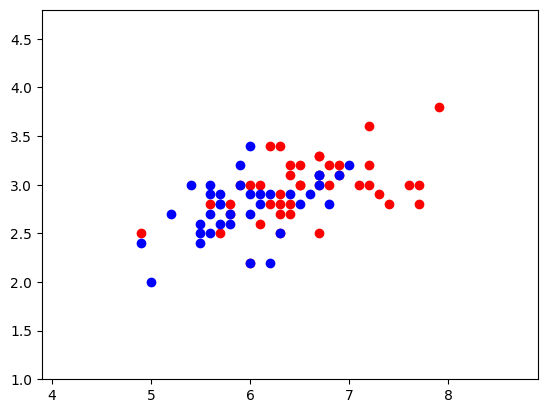

Bobot: [-1e-07, -7.500000000000004e-07, -2.900000000000001e-07, -1.3099999999999997e-06, -6.599999999999997e-07]


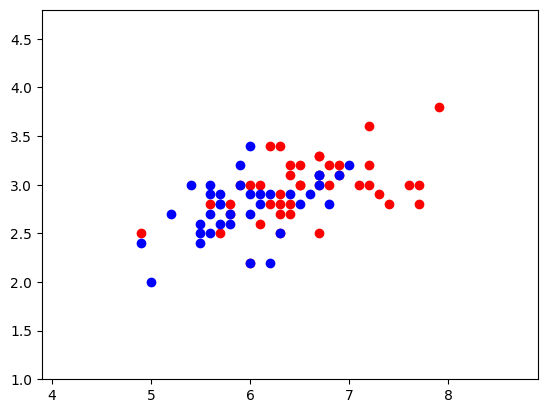

Bobot: [0.0, -1.6000000000000048e-07, 2.9999999999999925e-08, -8.299999999999998e-07, -4.799999999999997e-07]


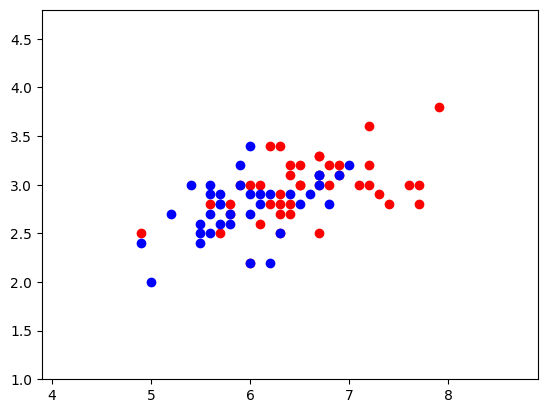

Bobot: [-1e-07, -8.000000000000005e-07, -2.900000000000001e-07, -1.3599999999999997e-06, -7.099999999999998e-07]


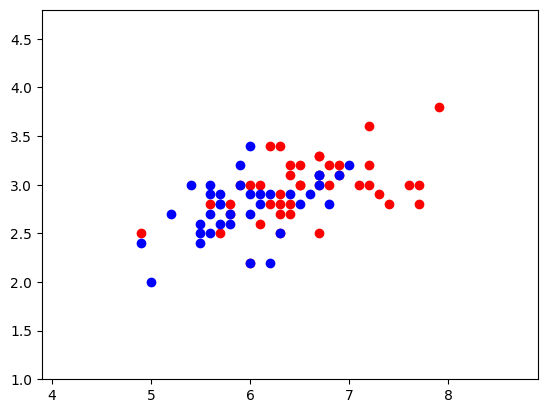

Bobot: [0.0, -2.5000000000000047e-07, -5.0000000000000104e-08, -9.799999999999997e-07, -5.999999999999998e-07]


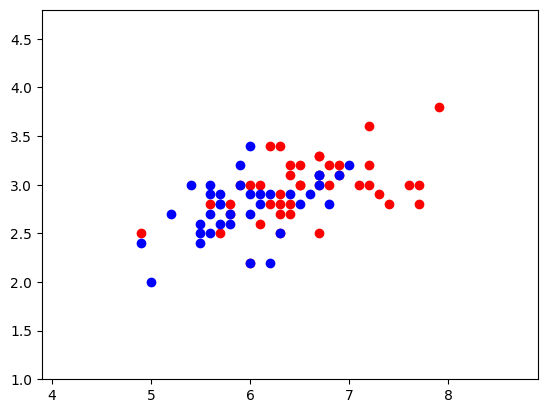

Bobot: [1e-07, 3.499999999999995e-07, 2.8999999999999987e-07, -5.299999999999998e-07, -4.3999999999999976e-07]


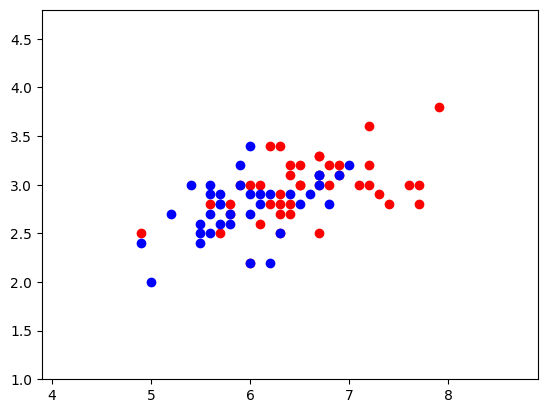

Bobot: [0.0, -3.2000000000000043e-07, -4.0000000000000093e-08, -1.0999999999999996e-06, -6.499999999999997e-07]


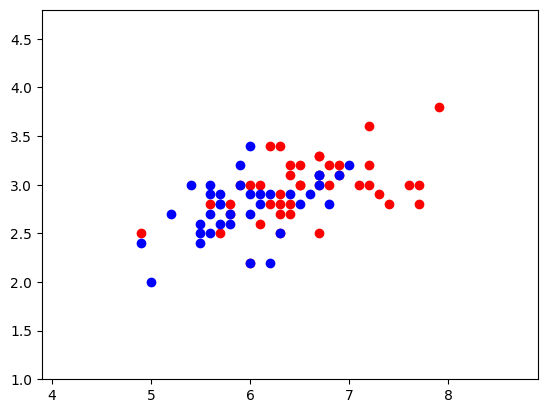

Bobot: [-1e-07, -9.200000000000004e-07, -2.600000000000001e-07, -1.5999999999999995e-06, -7.999999999999998e-07]


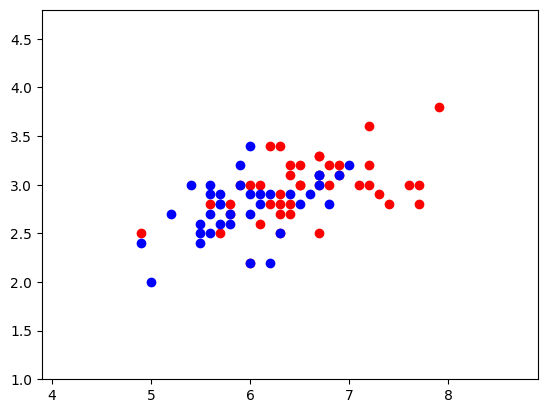

Bobot: [0.0, -2.800000000000004e-07, 2.999999999999987e-08, -1.1699999999999996e-06, -6.699999999999997e-07]


KeyboardInterrupt: 

In [67]:
#nomor 2 dengan learning rate rendah
th = 0.2
a = 0.0000001
max_epoch = -1
model, epoch = percep_fit2(X_train, y_train, th, a, max_epoch, verbose=True, draw=True)
out = percep_predict(X_test, model)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -6.4, -2.7, -5.3, -1.9]


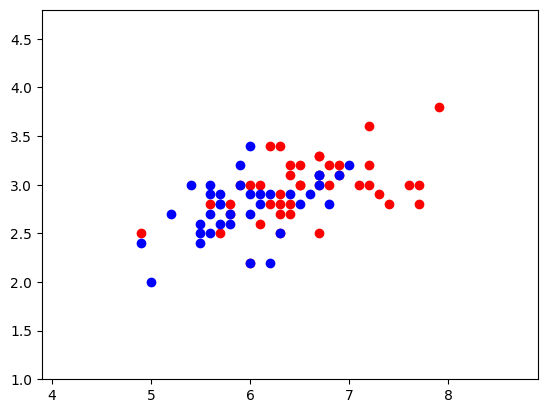

Bobot: [0.0, -0.20000000000000018, 0.19999999999999973, -1.0, -0.5999999999999999]


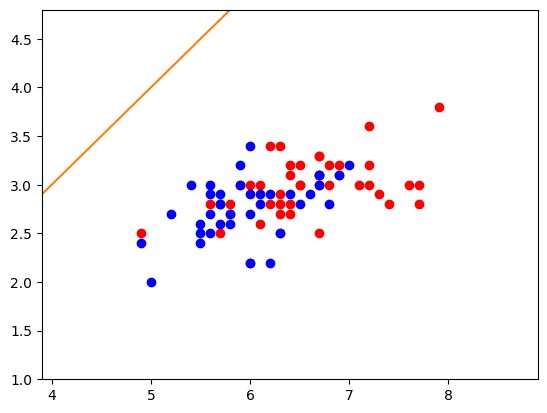

Bobot: [0.0, -0.20000000000000018, 0.19999999999999973, -1.0, -0.5999999999999999]


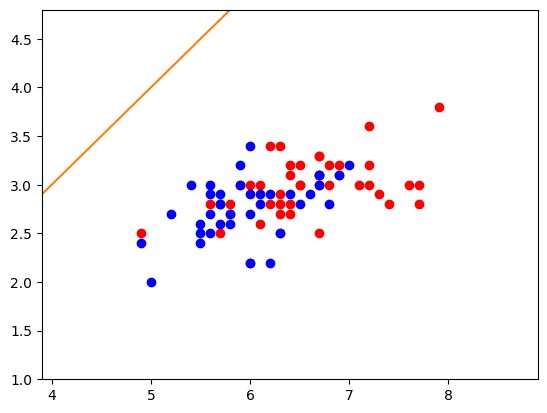

Bobot: [0.0, -0.20000000000000018, 0.19999999999999973, -1.0, -0.5999999999999999]


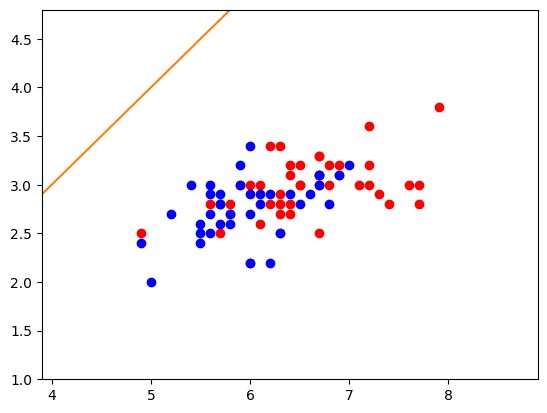

Bobot: [1.0, 6.7, 3.3, 3.9000000000000004, 0.9000000000000001]


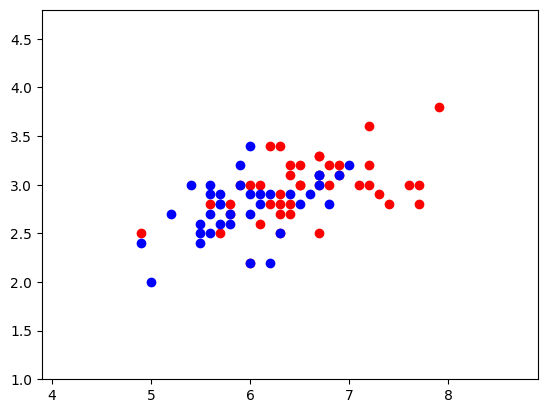

Bobot: [1.0, 6.7, 3.3, 3.9000000000000004, 0.9000000000000001]


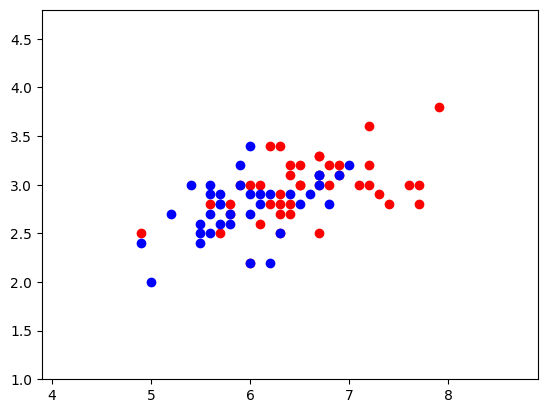

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


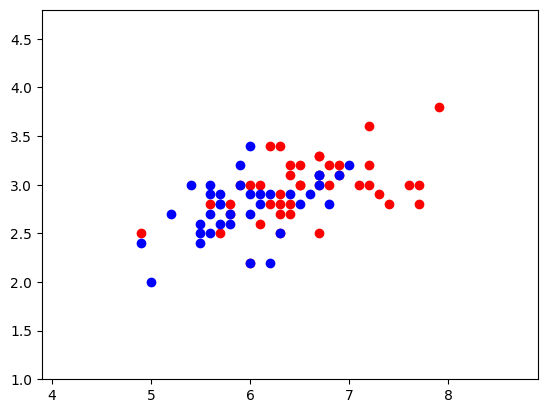

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


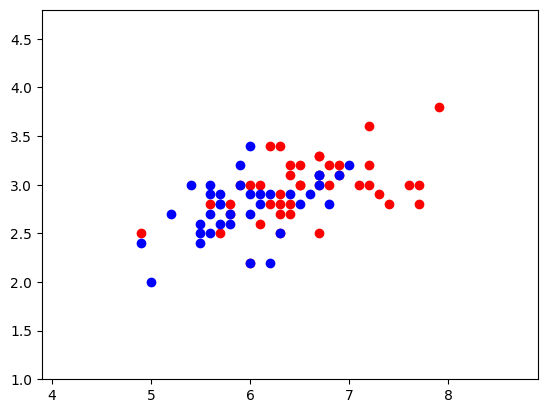

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


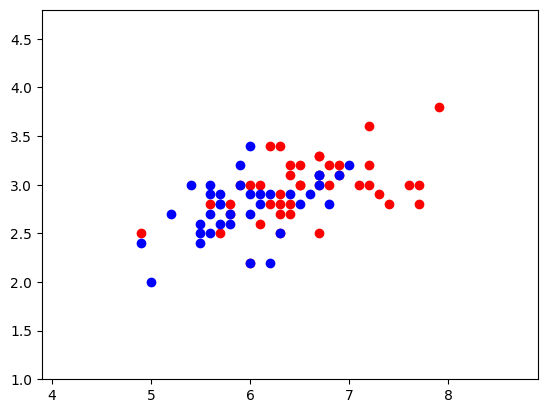

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


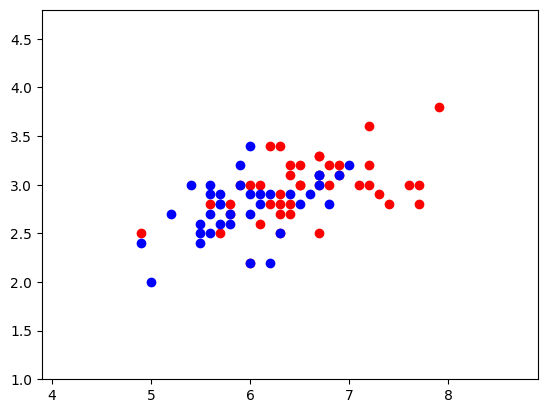

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


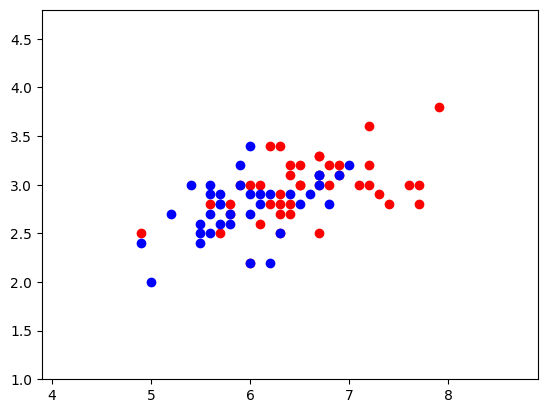

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


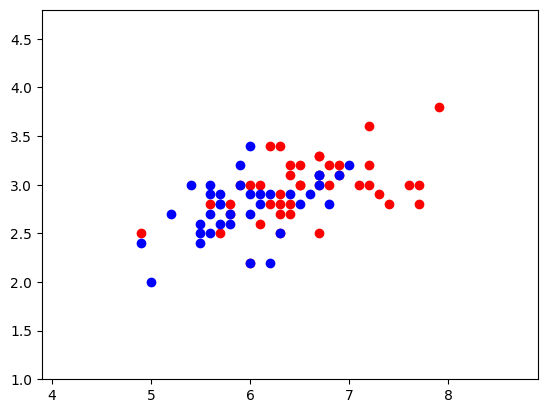

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


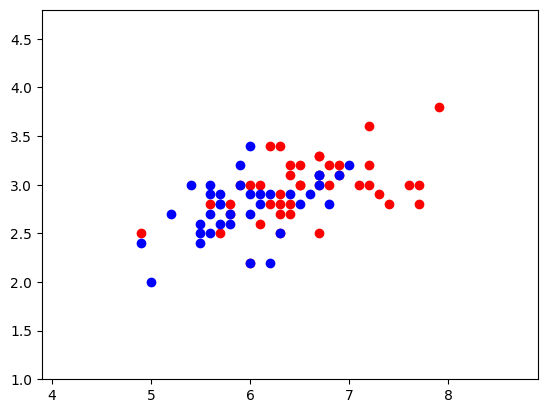

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


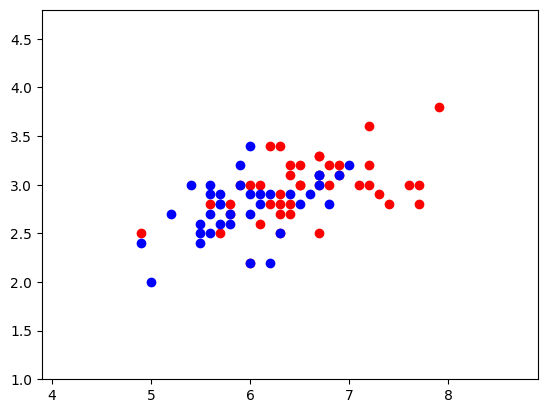

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


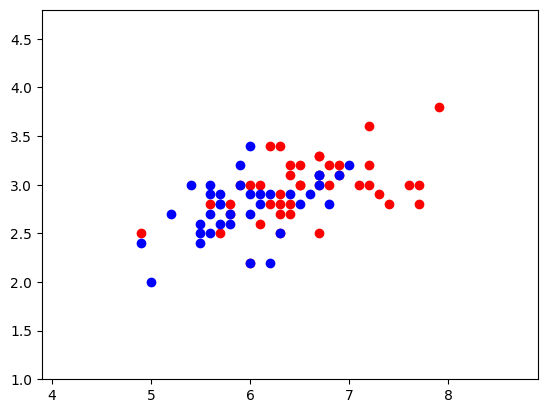

Bobot: [0.0, 0.2999999999999998, 0.6000000000000001, -2.9999999999999996, -1.9]


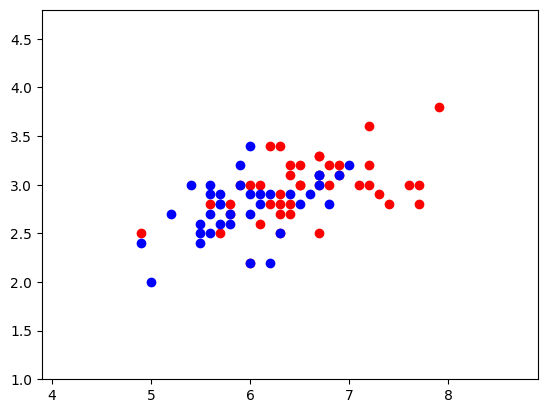

Bobot: [1.0, 7.0, 3.6, 2.0000000000000004, -0.19999999999999996]


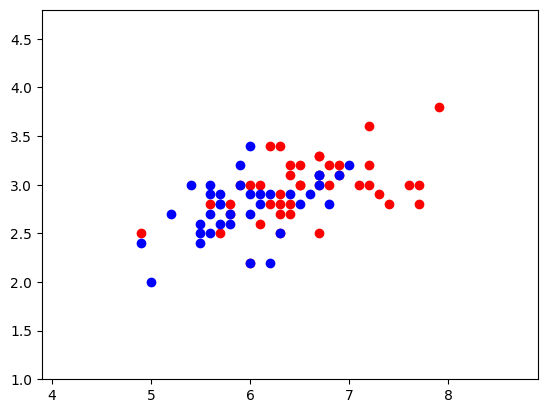

Bobot: [1.0, 7.0, 3.6, 2.0000000000000004, -0.19999999999999996]


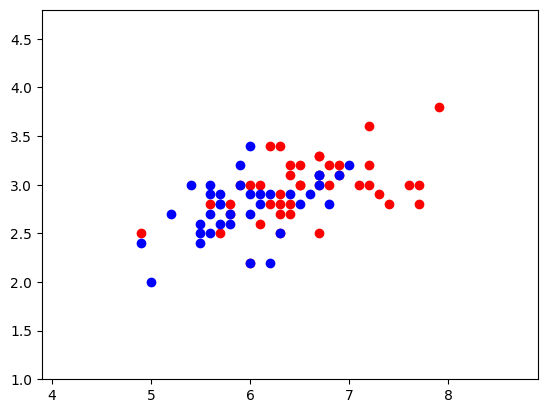

Bobot: [0.0, 0.5999999999999996, 0.3999999999999999, -3.2999999999999994, -2.5]


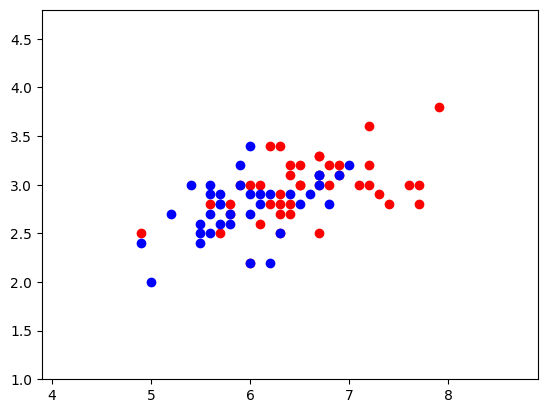

Bobot: [1.0, 6.1, 2.8, 0.5000000000000004, -1.4]


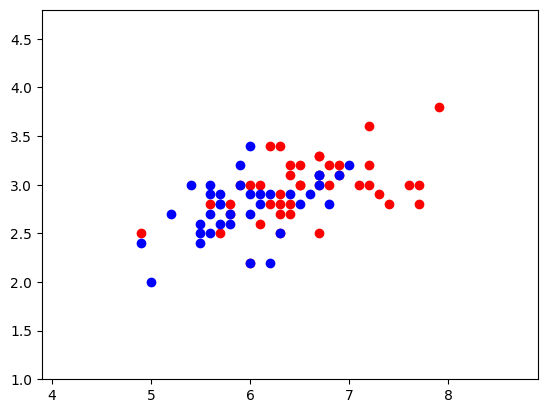

Bobot: [1.0, 6.1, 2.8, 0.5000000000000004, -1.4]


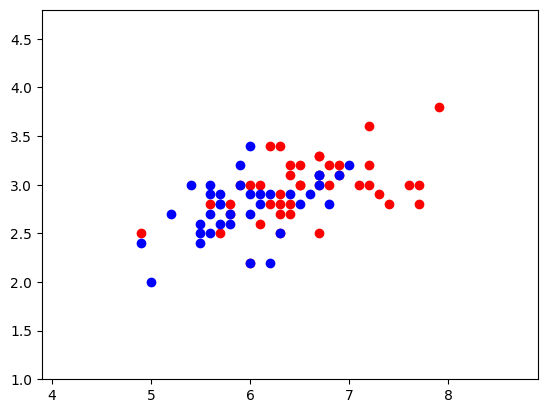

Bobot: [0.0, -0.6000000000000005, -0.5, -5.199999999999999, -3.5]


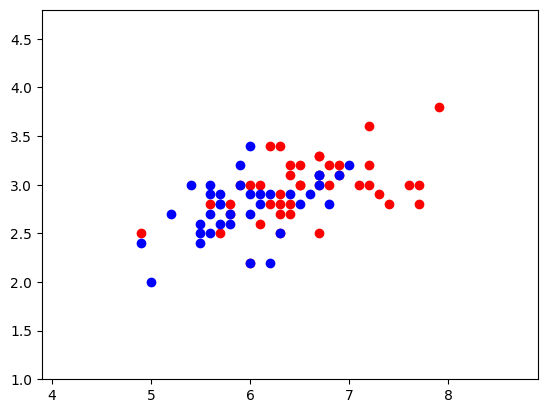

Bobot: [0.0, -0.6000000000000005, -0.5, -5.199999999999999, -3.5]


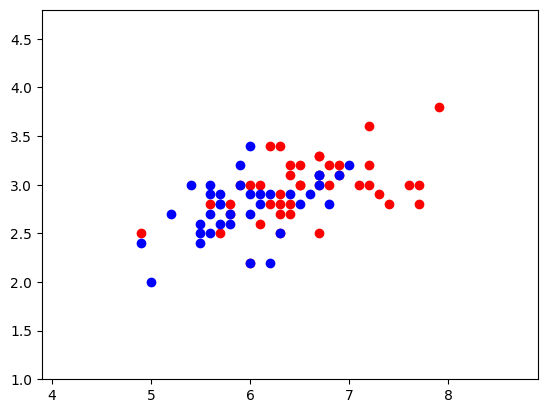

Bobot: [1.0, 5.8, 2.4, -0.8999999999999995, -2.2]


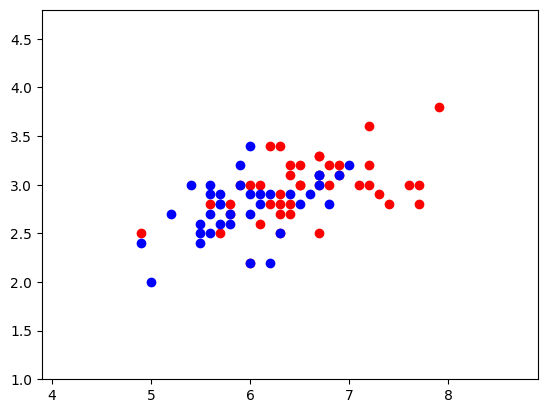

Bobot: [0.0, -1.4000000000000004, -0.6000000000000001, -6.699999999999999, -3.8000000000000003]


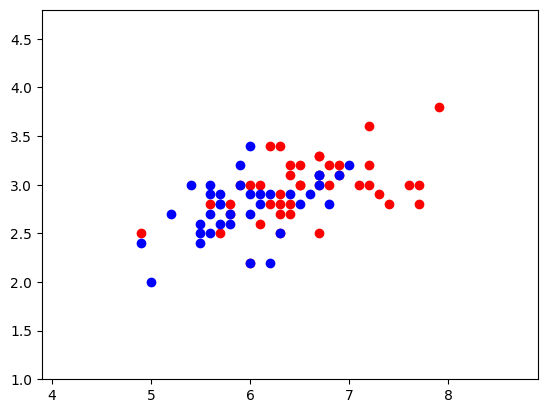

Bobot: [1.0, 4.6, 2.1, -1.5999999999999996, -2.2]


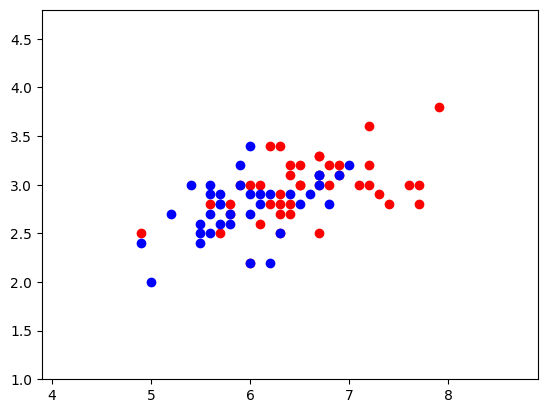

Bobot: [0.0, -1.7000000000000002, -0.7999999999999998, -7.199999999999999, -4.0]


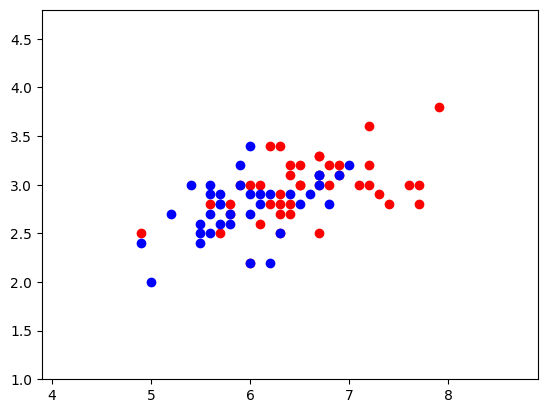

Bobot: [0.0, -1.7000000000000002, -0.7999999999999998, -7.199999999999999, -4.0]


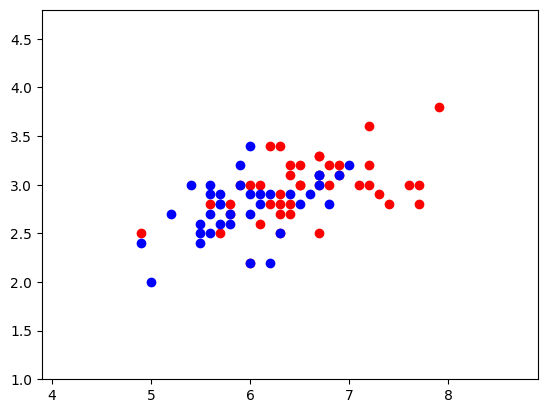

Bobot: [1.0, 4.1, 1.9000000000000004, -3.0999999999999996, -3.0]


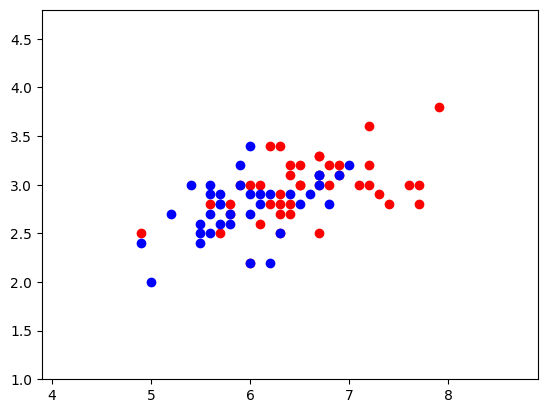

Bobot: [0.0, -2.2, -0.8999999999999995, -8.2, -4.5]


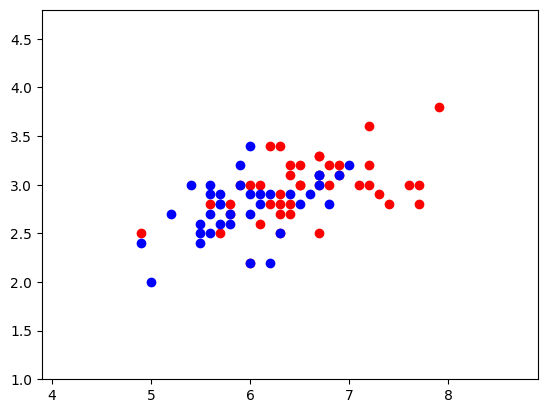

Bobot: [1.0, 3.5999999999999996, 1.7000000000000006, -4.199999999999999, -3.3]


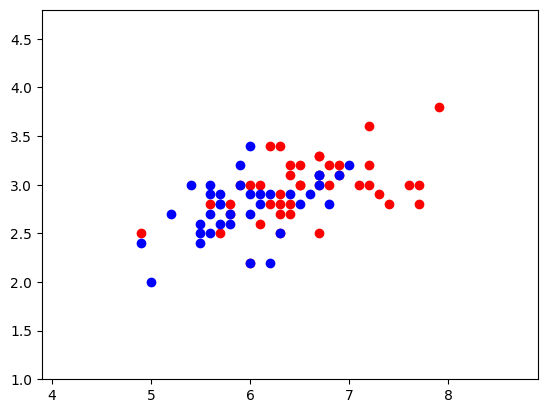

Bobot: [1.0, 3.5999999999999996, 1.7000000000000006, -4.199999999999999, -3.3]


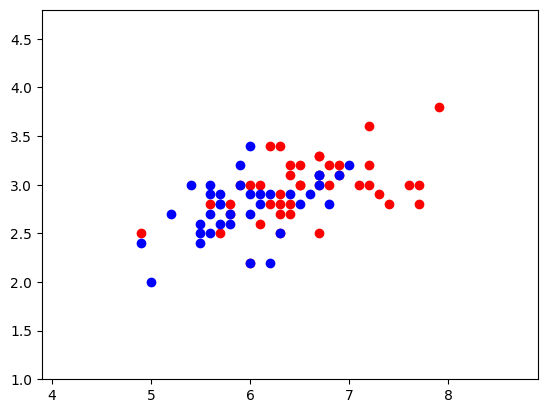

Bobot: [0.0, -2.6000000000000005, -1.0999999999999992, -9.0, -5.1]


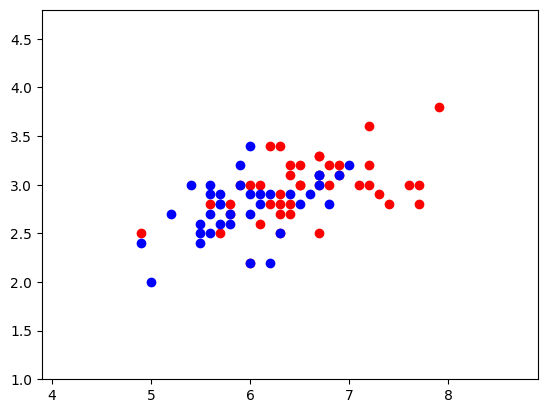

Bobot: [1.0, 4.1, 2.000000000000001, -4.6, -3.6999999999999997]


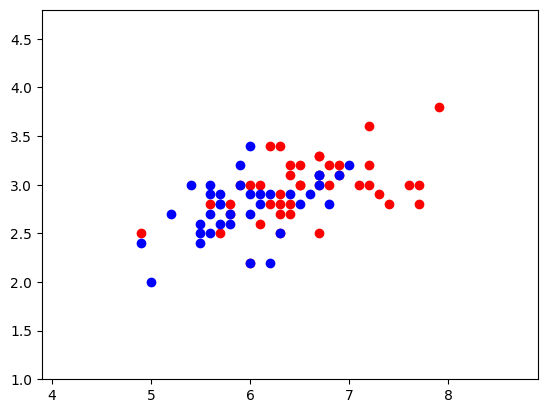

Bobot: [0.0, -2.2, -0.4999999999999991, -9.6, -5.6]


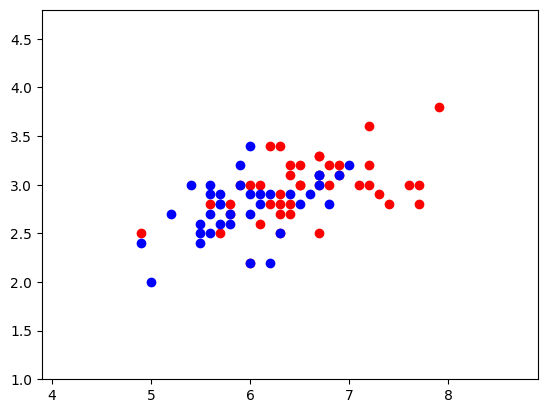

Bobot: [0.0, -2.2, -0.4999999999999991, -9.6, -5.6]


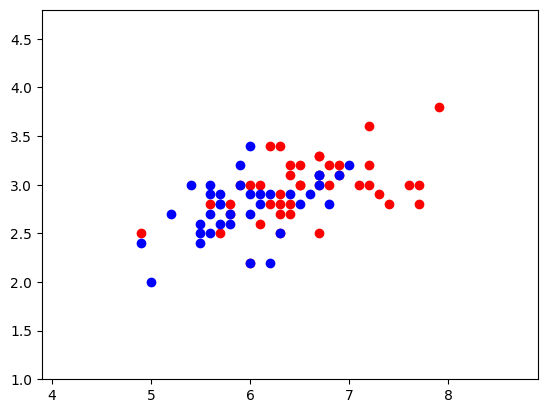

Bobot: [0.0, -2.2, -0.4999999999999991, -9.6, -5.6]


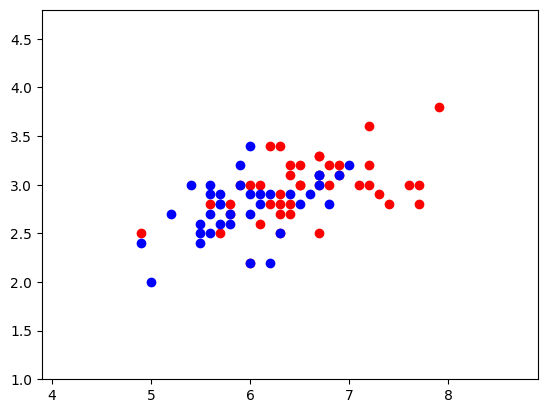

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


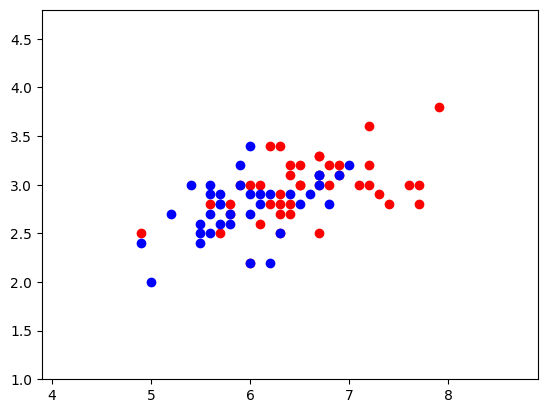

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


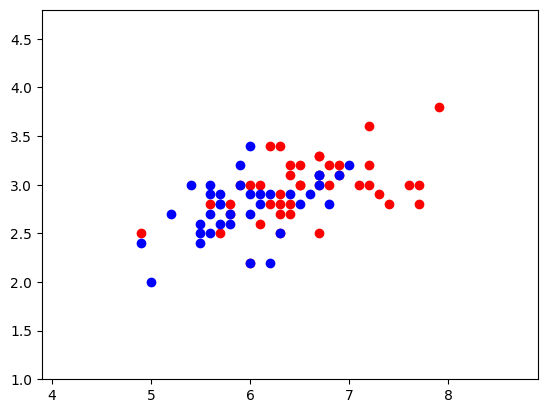

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


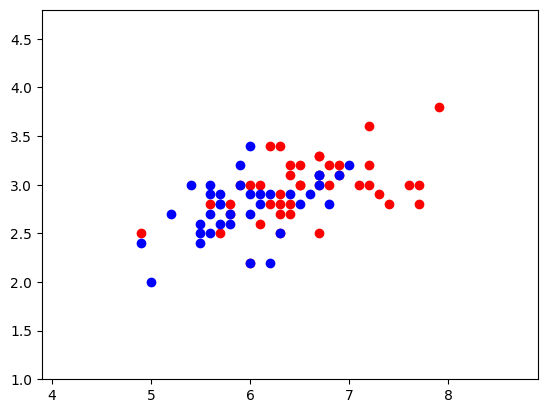

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


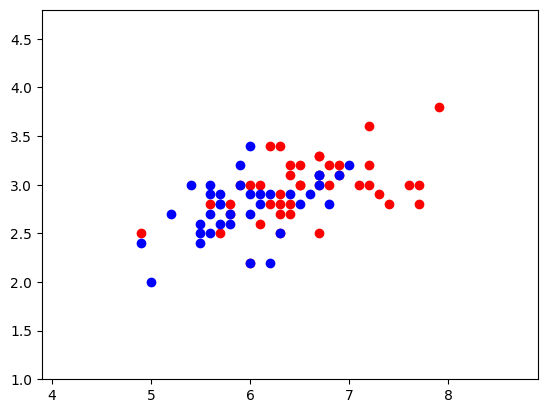

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


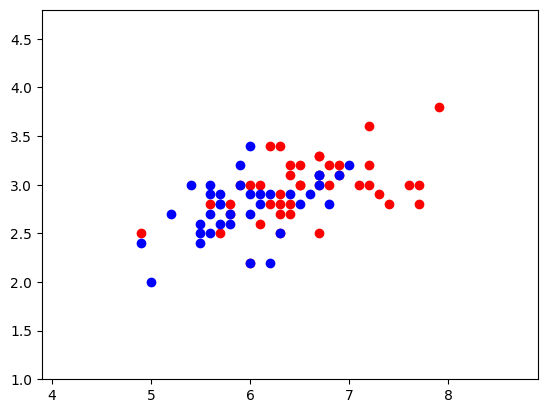

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


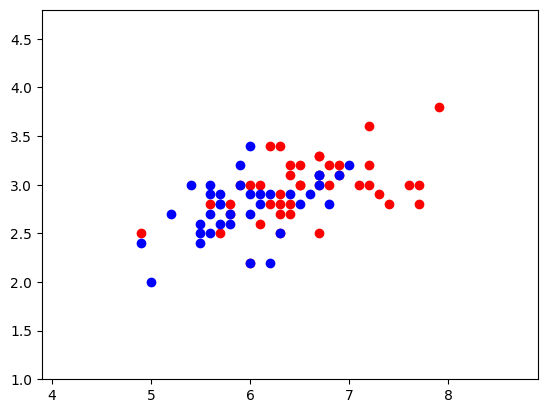

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


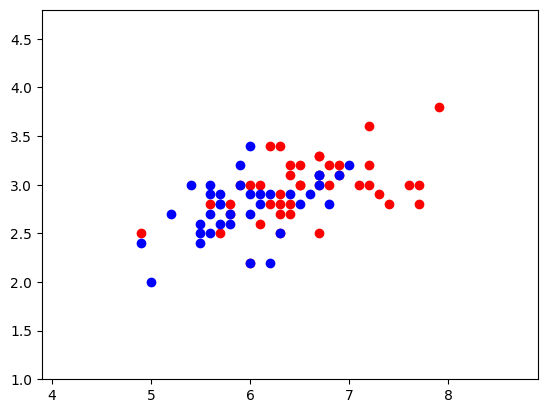

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


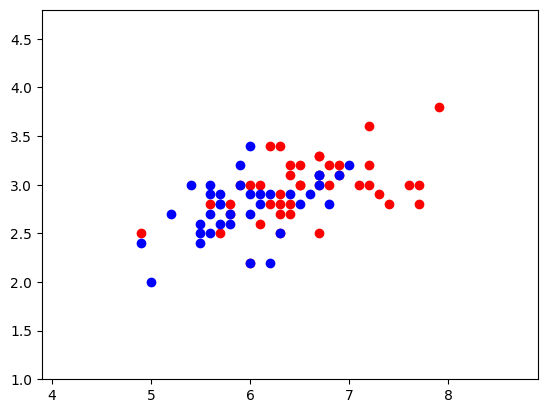

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


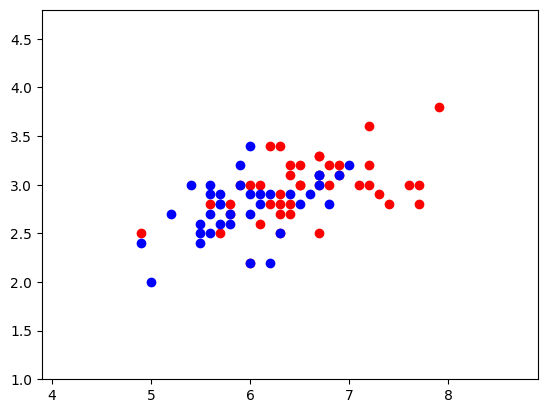

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


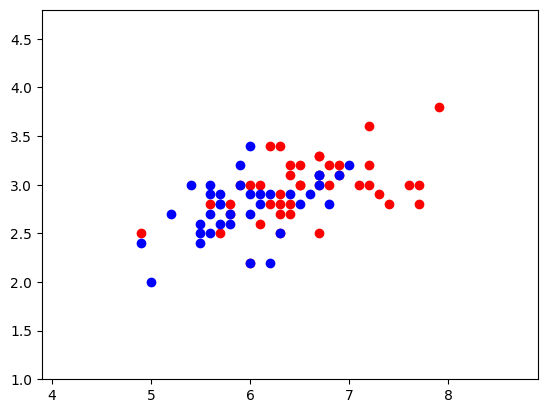

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


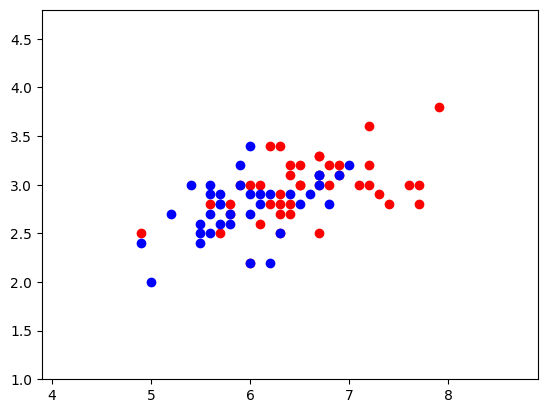

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


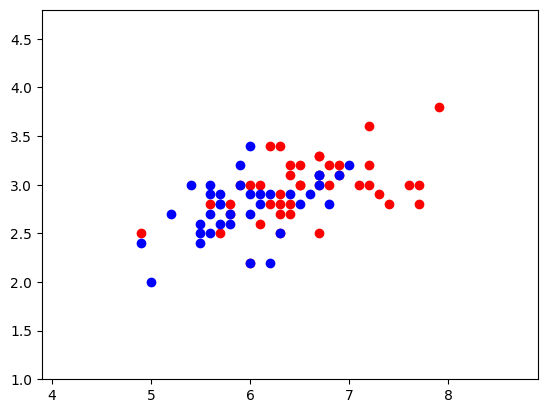

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


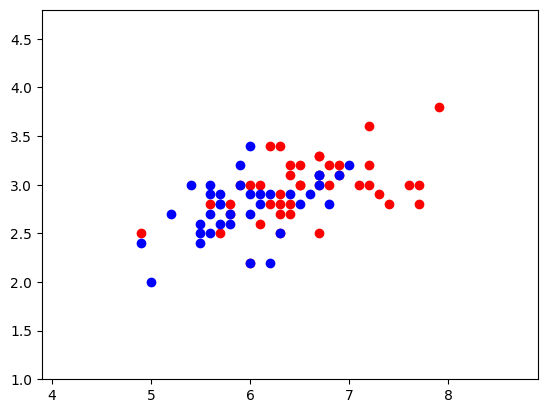

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


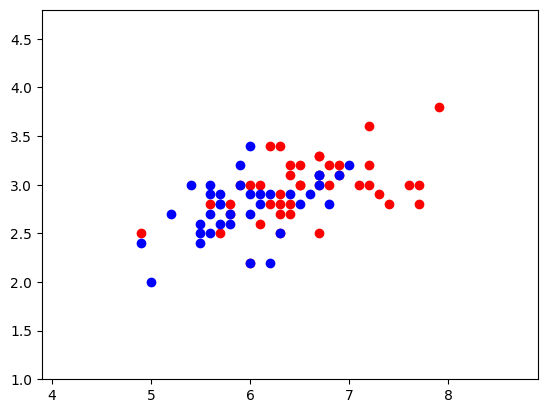

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


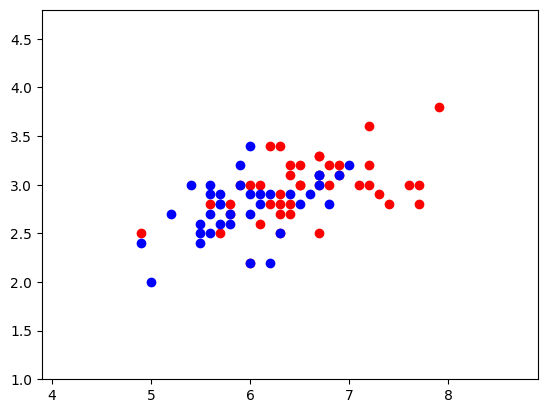

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


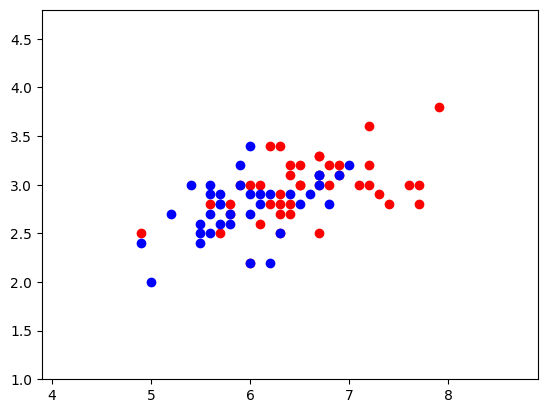

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


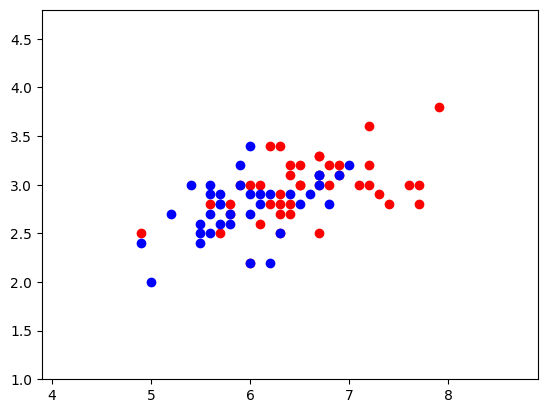

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


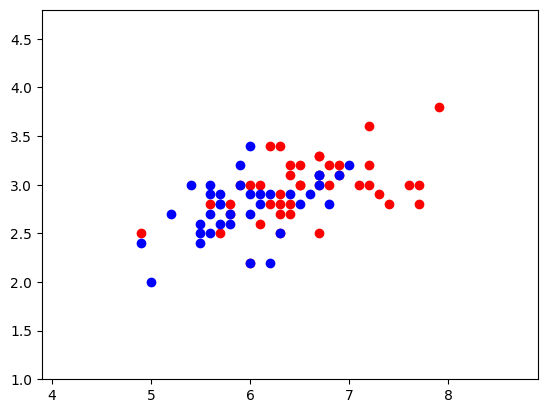

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


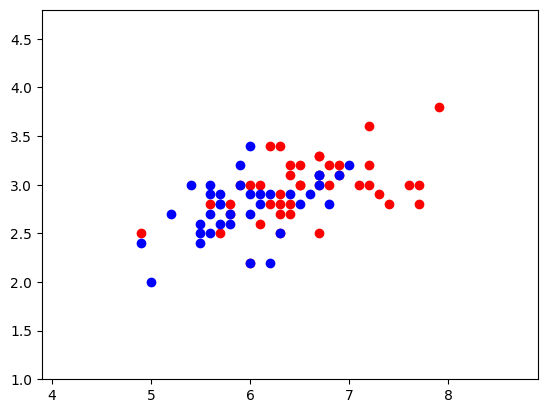

Bobot: [1.0, 4.0, 1.700000000000001, -5.1, -4.1]


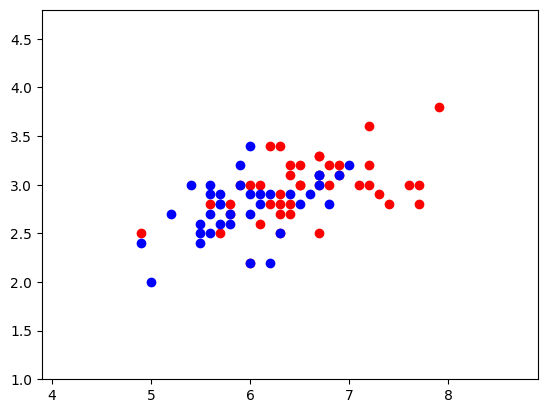

Bobot: [2.0, 9.4, 4.700000000000001, -0.5999999999999996, -2.5999999999999996]


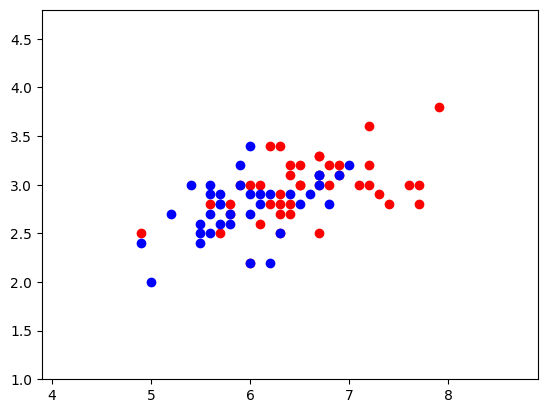

Bobot: [1.0, 2.2, 1.100000000000001, -6.699999999999999, -5.1]


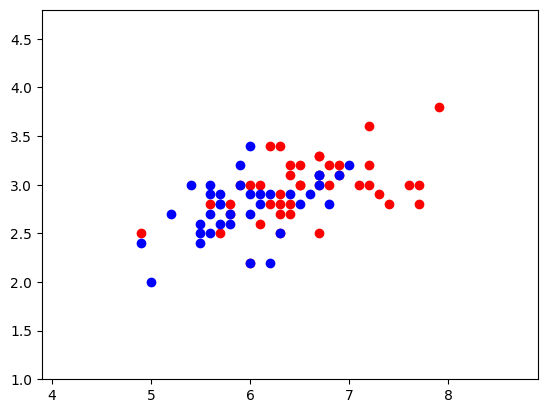

Bobot: [2.0, 7.9, 3.700000000000001, -3.1999999999999993, -4.1]


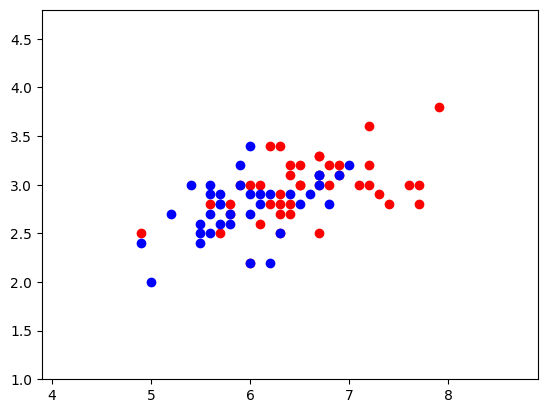

Bobot: [2.0, 7.9, 3.700000000000001, -3.1999999999999993, -4.1]


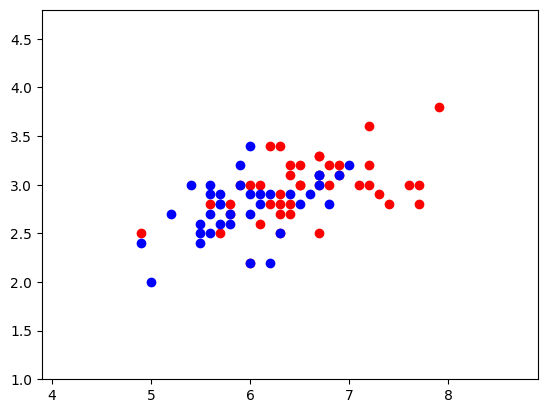

Bobot: [2.0, 7.9, 3.700000000000001, -3.1999999999999993, -4.1]


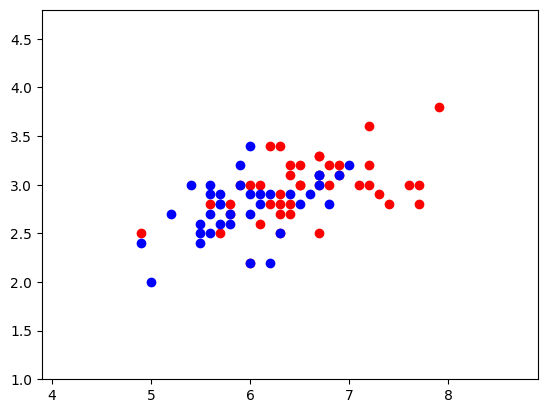

Bobot: [1.0, 1.2000000000000002, 0.40000000000000124, -8.899999999999999, -6.6]


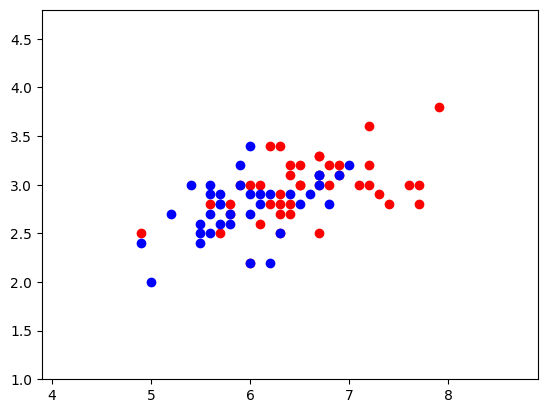

Bobot: [2.0, 7.2, 2.6000000000000014, -4.899999999999999, -5.6]


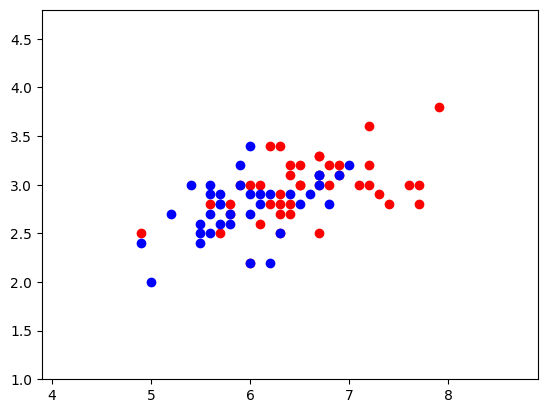

Bobot: [2.0, 7.2, 2.6000000000000014, -4.899999999999999, -5.6]


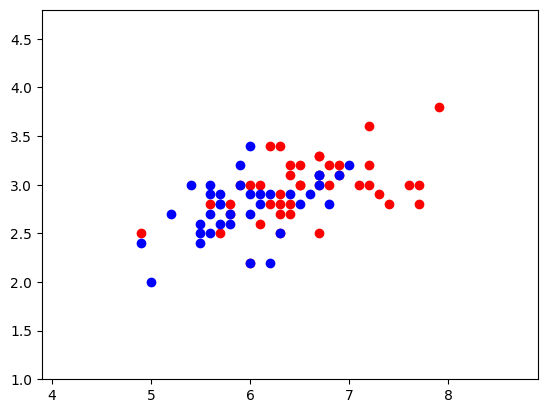

Bobot: [1.0, 1.4000000000000004, -0.1999999999999984, -9.999999999999998, -8.0]


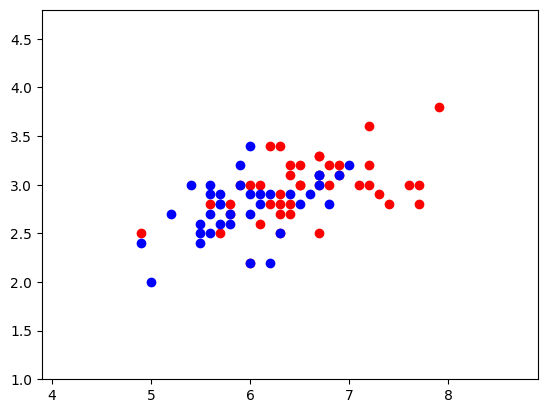

Bobot: [1.0, 1.4000000000000004, -0.1999999999999984, -9.999999999999998, -8.0]


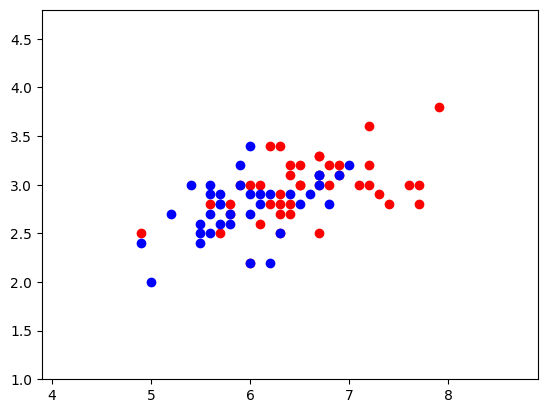

Bobot: [1.0, 1.4000000000000004, -0.1999999999999984, -9.999999999999998, -8.0]


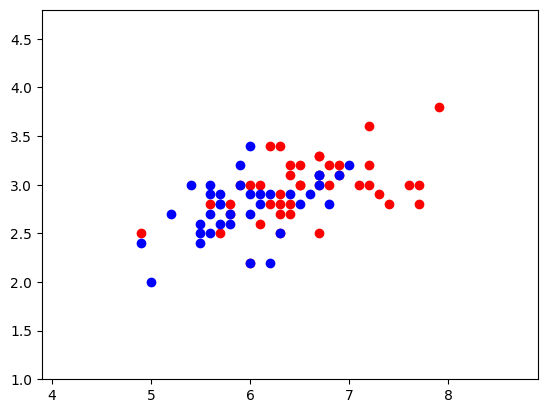

Bobot: [1.0, 1.4000000000000004, -0.1999999999999984, -9.999999999999998, -8.0]


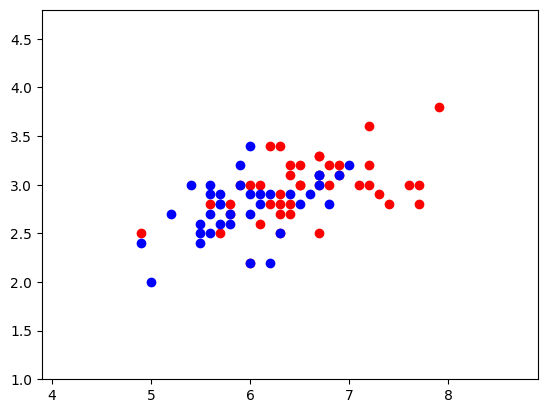

Bobot: [2.0, 7.9, 2.6000000000000014, -5.399999999999999, -6.5]


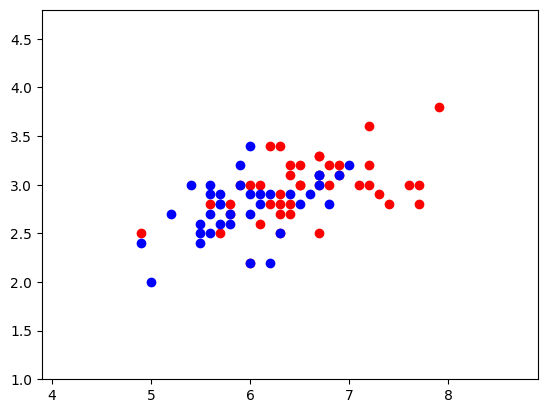

Bobot: [2.0, 7.9, 2.6000000000000014, -5.399999999999999, -6.5]


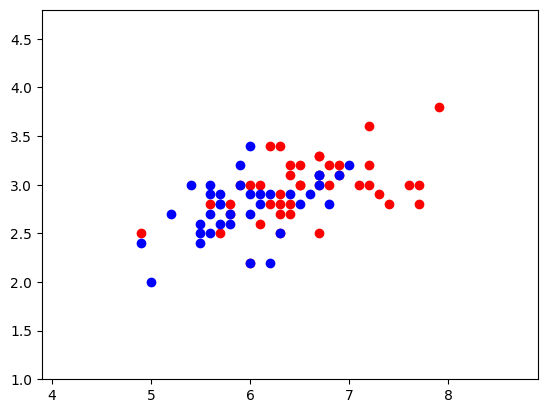

Bobot: [1.0, 1.8000000000000007, -0.3999999999999986, -10.299999999999999, -8.3]


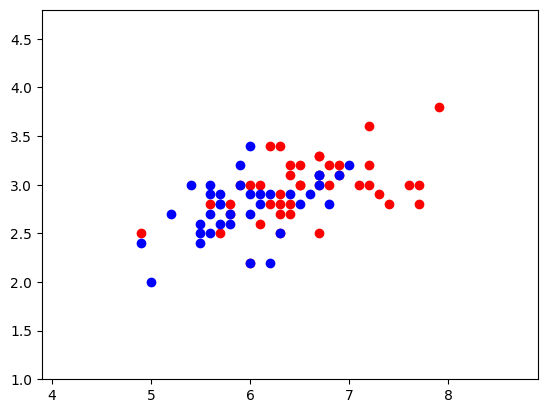

Bobot: [2.0, 7.000000000000001, 2.3000000000000016, -6.399999999999999, -6.9]


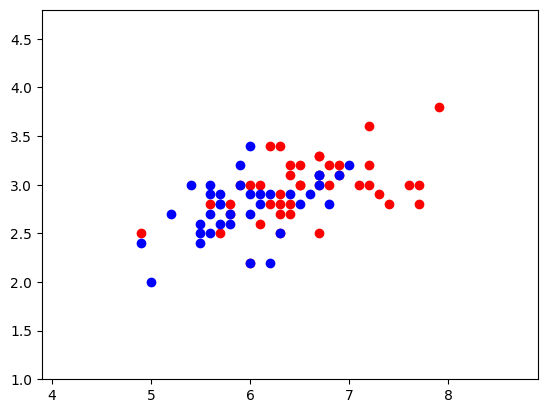

Bobot: [1.0, -0.1999999999999993, -0.8999999999999986, -12.399999999999999, -8.700000000000001]


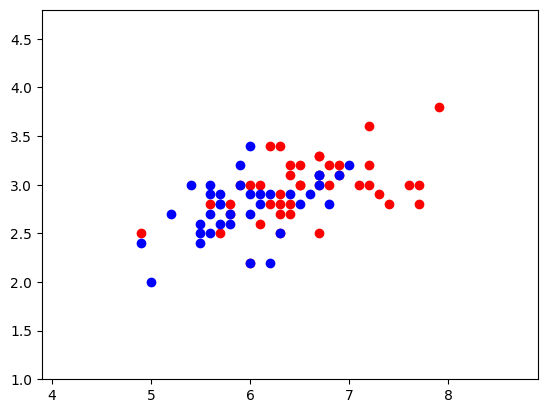

Bobot: [1.0, -0.1999999999999993, -0.8999999999999986, -12.399999999999999, -8.700000000000001]


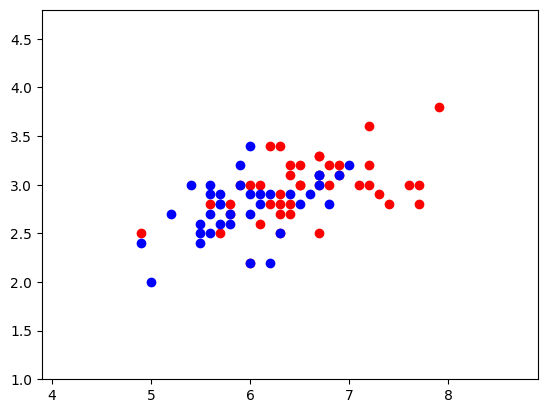

Bobot: [1.0, -0.1999999999999993, -0.8999999999999986, -12.399999999999999, -8.700000000000001]


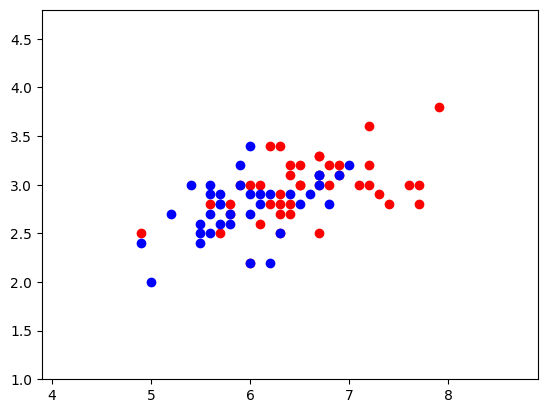

Bobot: [1.0, -0.1999999999999993, -0.8999999999999986, -12.399999999999999, -8.700000000000001]


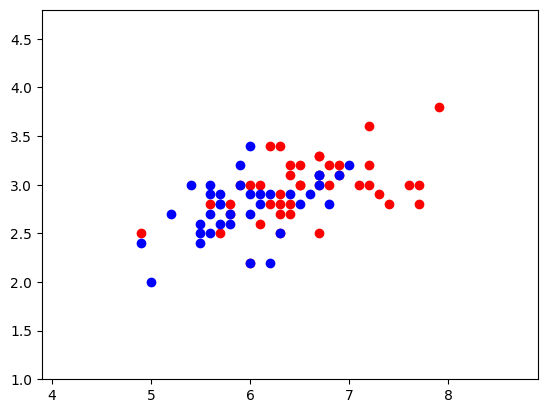

Bobot: [1.0, -0.1999999999999993, -0.8999999999999986, -12.399999999999999, -8.700000000000001]


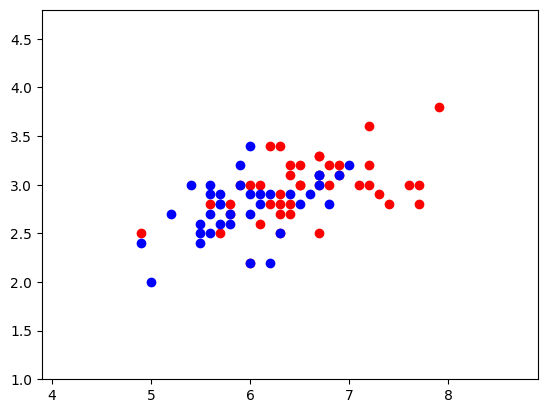

Bobot: [2.0, 5.700000000000001, 2.1000000000000014, -8.2, -7.200000000000001]


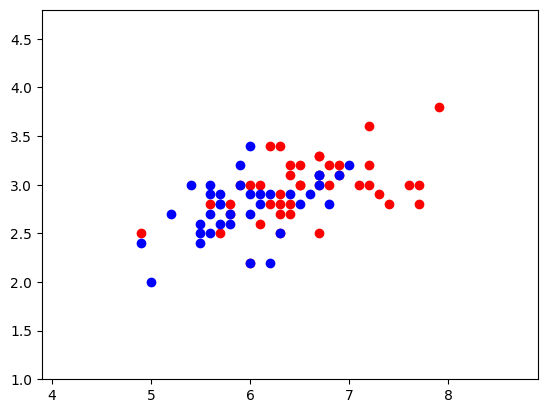

Bobot: [2.0, 5.700000000000001, 2.1000000000000014, -8.2, -7.200000000000001]


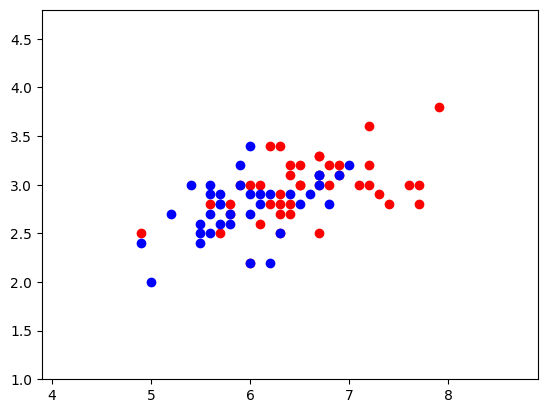


Epoch 2
Bobot: [2.0, 5.700000000000001, 2.1000000000000014, -8.2, -7.200000000000001]


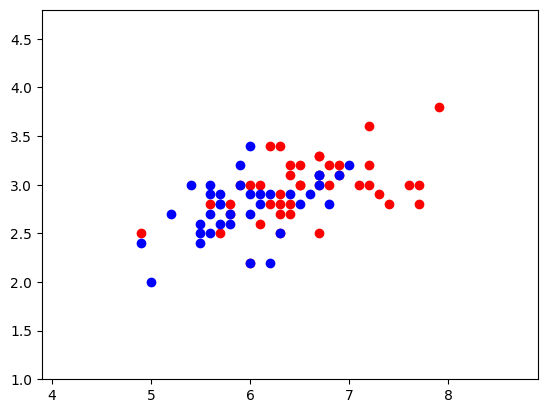

Bobot: [3.0, 11.900000000000002, 5.000000000000002, -3.8999999999999995, -5.900000000000001]


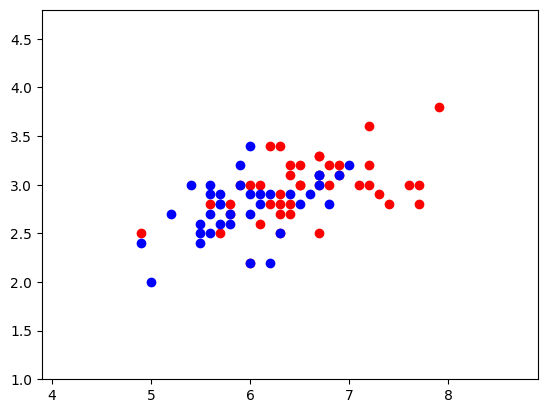

Bobot: [2.0, 5.400000000000002, 2.0000000000000018, -9.7, -8.100000000000001]


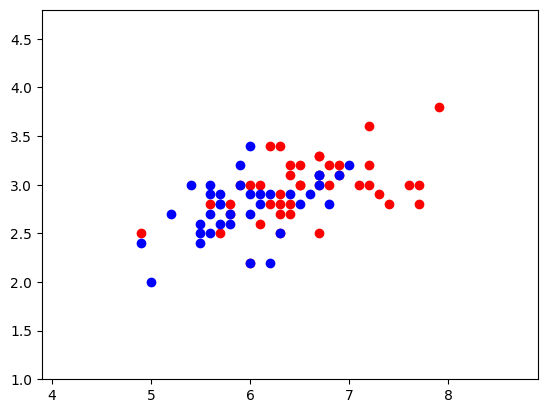

Bobot: [2.0, 5.400000000000002, 2.0000000000000018, -9.7, -8.100000000000001]


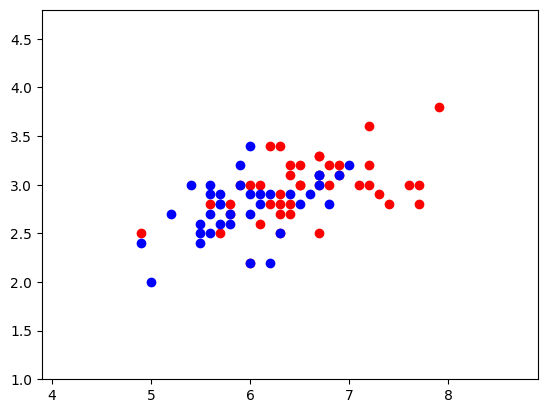

Bobot: [3.0, 12.300000000000002, 5.100000000000001, -4.799999999999999, -6.600000000000001]


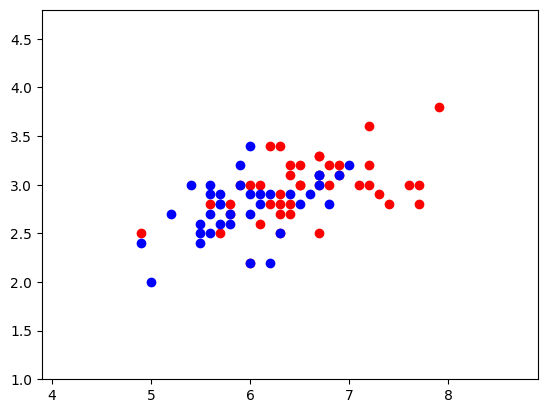

Bobot: [3.0, 12.300000000000002, 5.100000000000001, -4.799999999999999, -6.600000000000001]


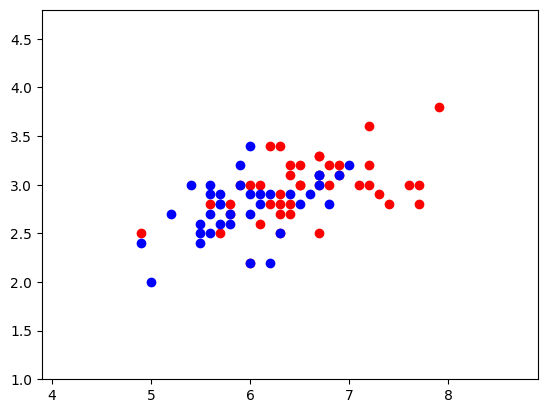

Bobot: [2.0, 5.900000000000002, 2.3000000000000016, -10.399999999999999, -8.700000000000001]


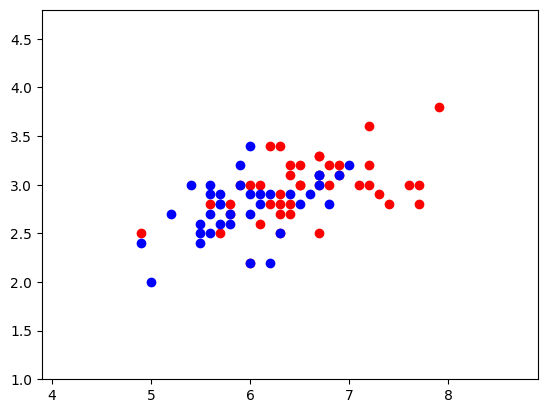

Bobot: [2.0, 5.900000000000002, 2.3000000000000016, -10.399999999999999, -8.700000000000001]


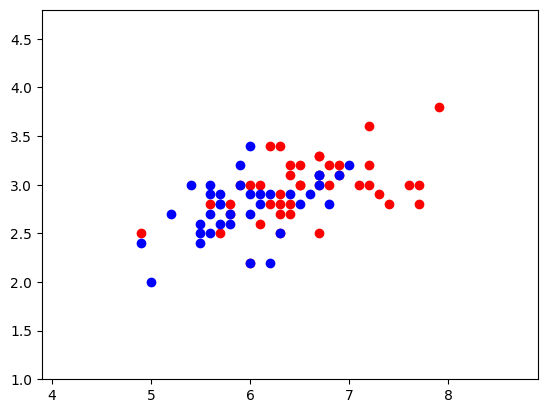

Bobot: [2.0, 5.900000000000002, 2.3000000000000016, -10.399999999999999, -8.700000000000001]


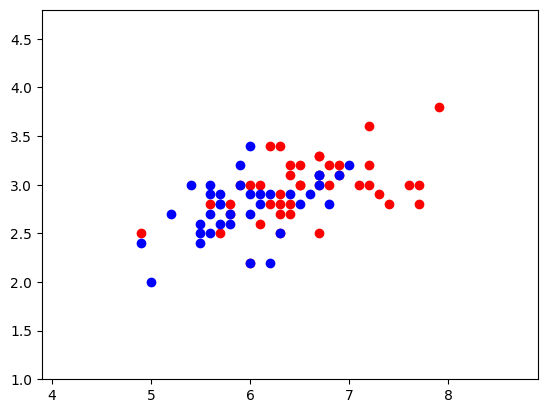

Bobot: [2.0, 5.900000000000002, 2.3000000000000016, -10.399999999999999, -8.700000000000001]


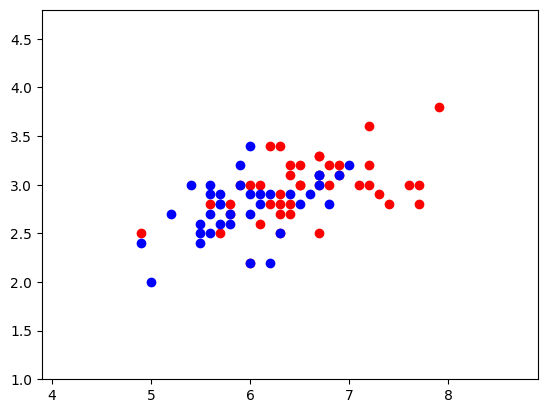

Bobot: [2.0, 5.900000000000002, 2.3000000000000016, -10.399999999999999, -8.700000000000001]


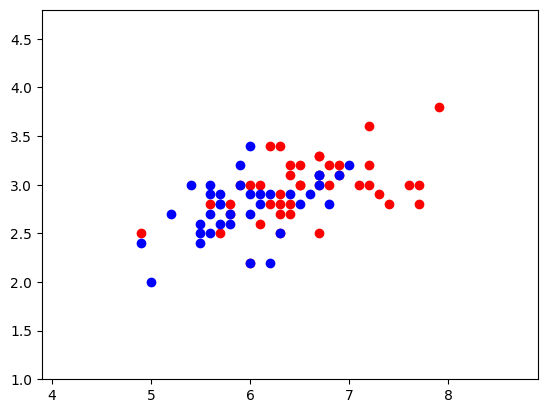

Bobot: [3.0, 11.500000000000002, 5.200000000000001, -6.799999999999999, -7.400000000000001]


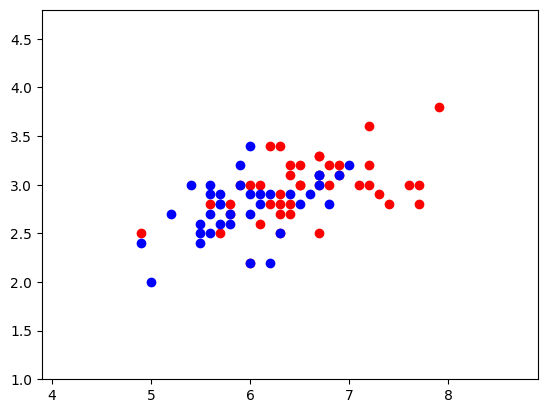

Bobot: [3.0, 11.500000000000002, 5.200000000000001, -6.799999999999999, -7.400000000000001]


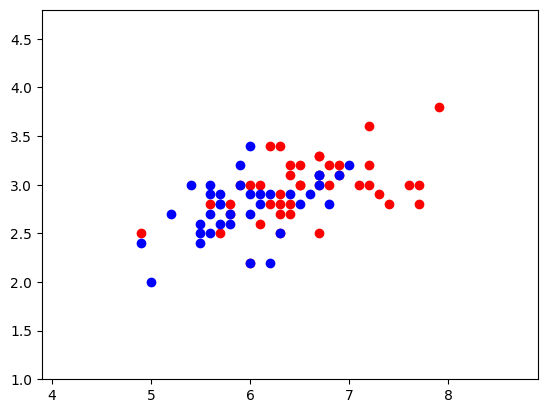

Bobot: [3.0, 11.500000000000002, 5.200000000000001, -6.799999999999999, -7.400000000000001]


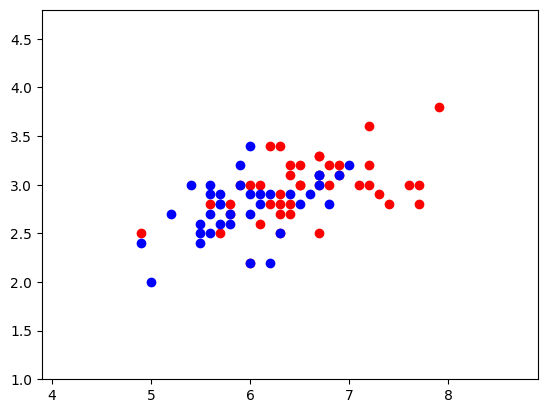

Bobot: [3.0, 11.500000000000002, 5.200000000000001, -6.799999999999999, -7.400000000000001]


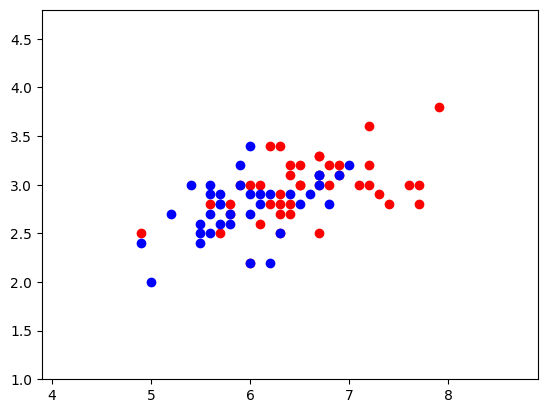

Bobot: [2.0, 5.900000000000002, 2.4000000000000012, -11.7, -9.400000000000002]


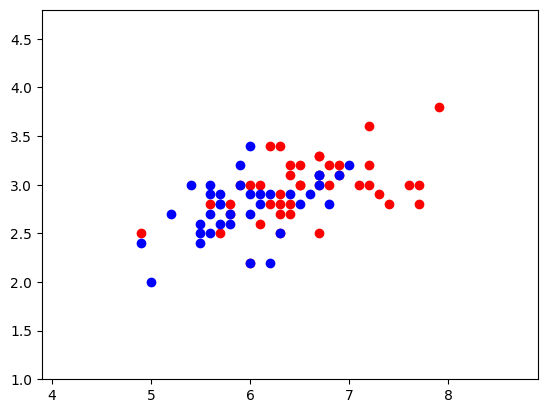

Bobot: [3.0, 12.600000000000001, 5.400000000000001, -6.699999999999999, -7.700000000000002]


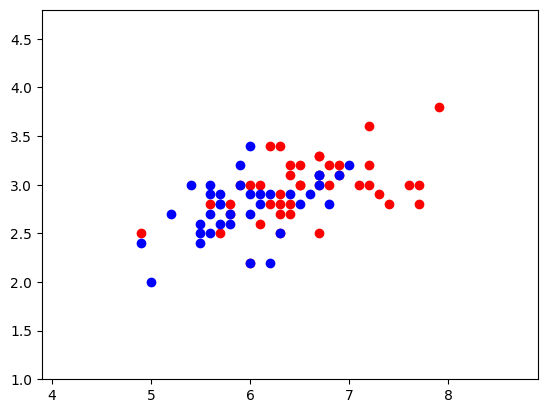

Bobot: [3.0, 12.600000000000001, 5.400000000000001, -6.699999999999999, -7.700000000000002]


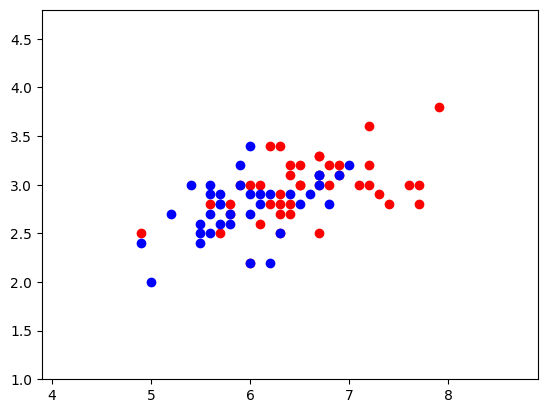

Bobot: [2.0, 6.200000000000001, 2.200000000000001, -12.0, -10.000000000000002]


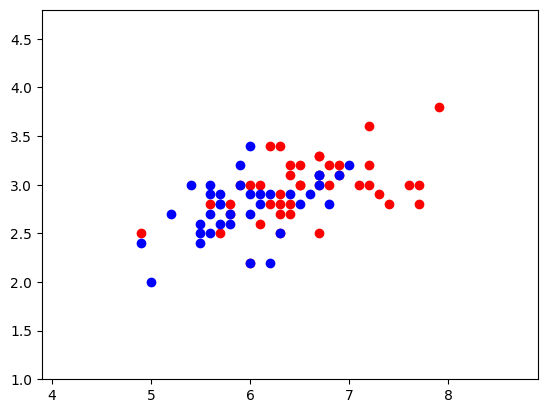

Bobot: [3.0, 11.700000000000001, 4.600000000000001, -8.2, -8.900000000000002]


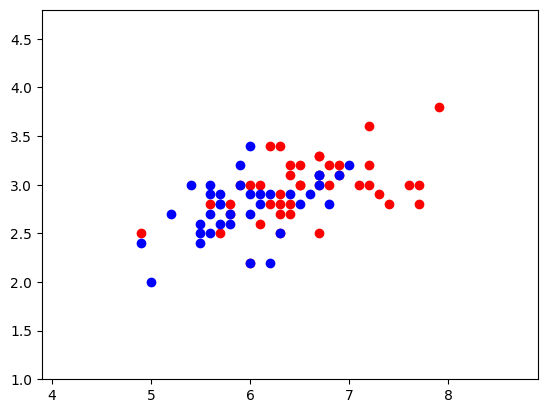

Bobot: [3.0, 11.700000000000001, 4.600000000000001, -8.2, -8.900000000000002]


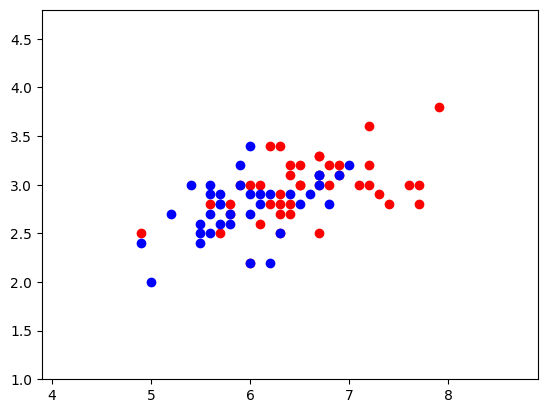

Bobot: [2.0, 5.000000000000001, 1.3000000000000016, -13.899999999999999, -11.000000000000002]


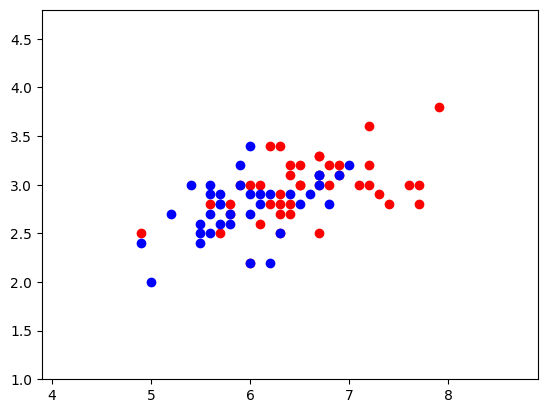

Bobot: [2.0, 5.000000000000001, 1.3000000000000016, -13.899999999999999, -11.000000000000002]


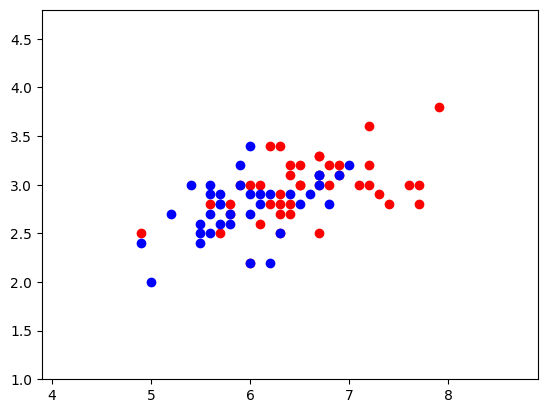

Bobot: [3.0, 11.400000000000002, 4.200000000000001, -9.599999999999998, -9.700000000000001]


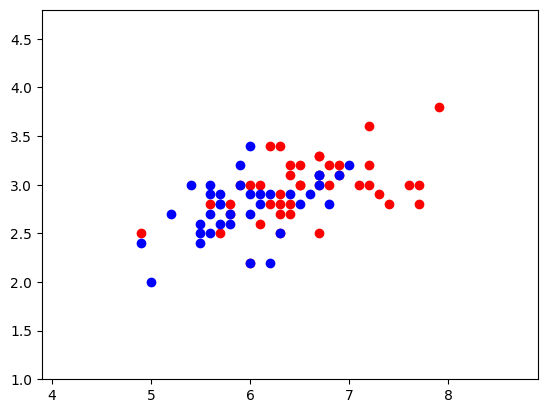

Bobot: [2.0, 4.200000000000002, 1.200000000000001, -15.399999999999999, -11.3]


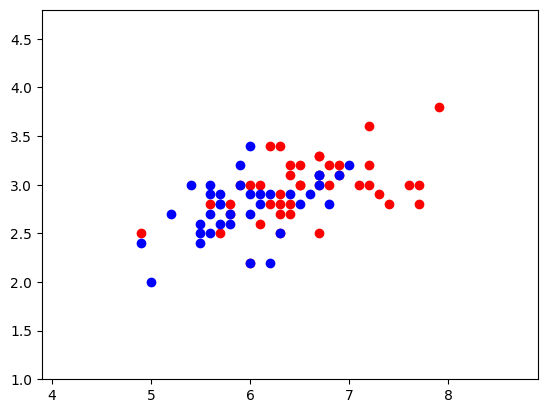

Bobot: [3.0, 10.200000000000003, 3.9000000000000012, -10.299999999999999, -9.700000000000001]


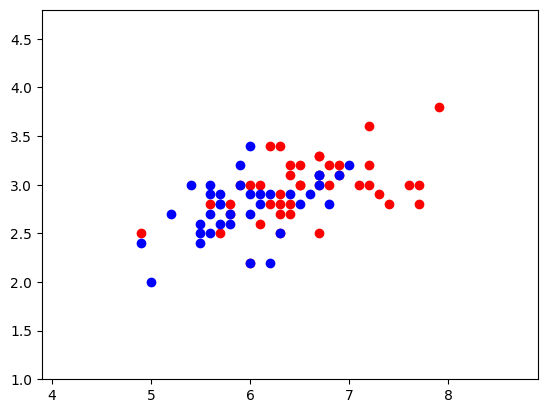

Bobot: [2.0, 3.900000000000003, 1.0000000000000013, -15.899999999999999, -11.500000000000002]


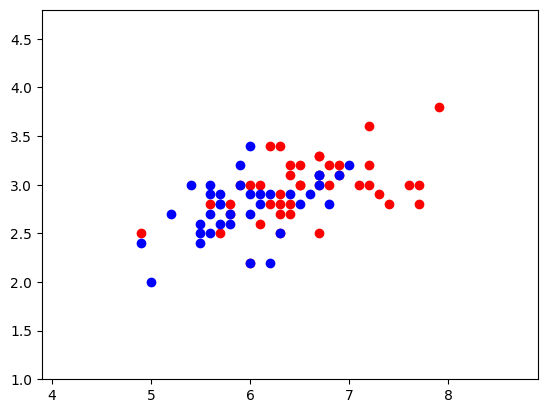

Bobot: [2.0, 3.900000000000003, 1.0000000000000013, -15.899999999999999, -11.500000000000002]


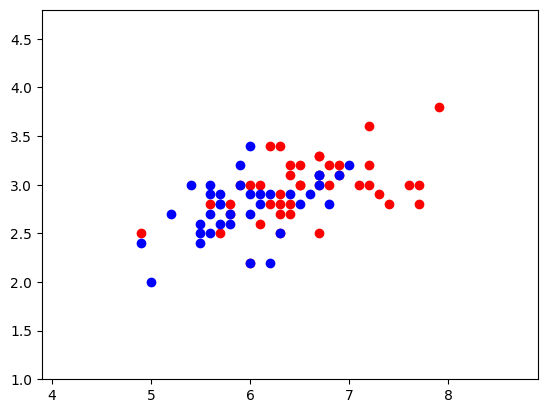

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


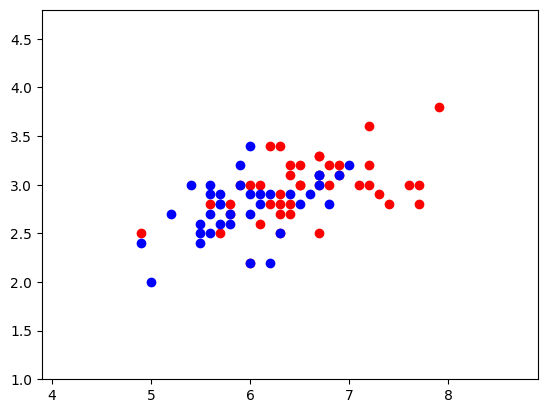

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


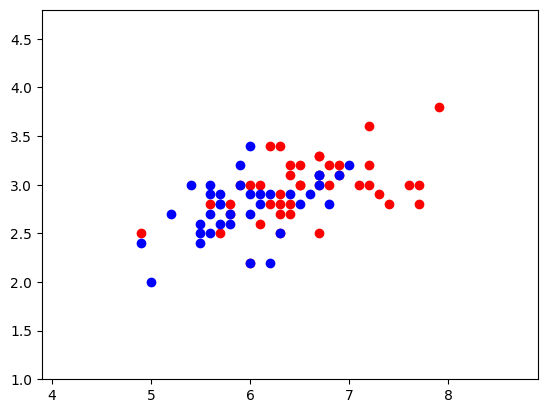

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


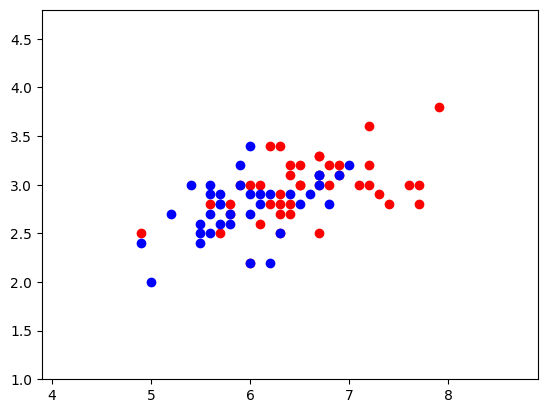

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


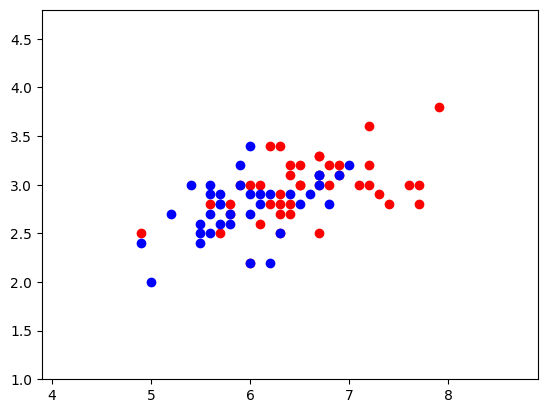

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


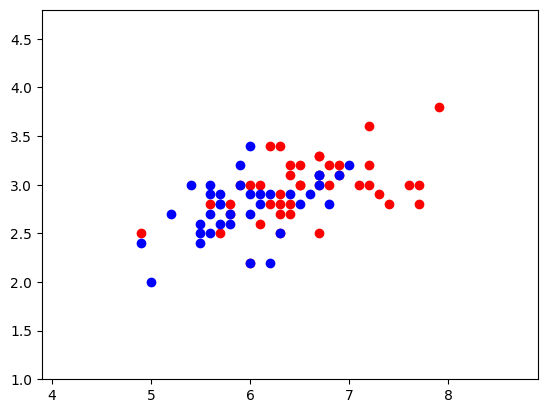

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


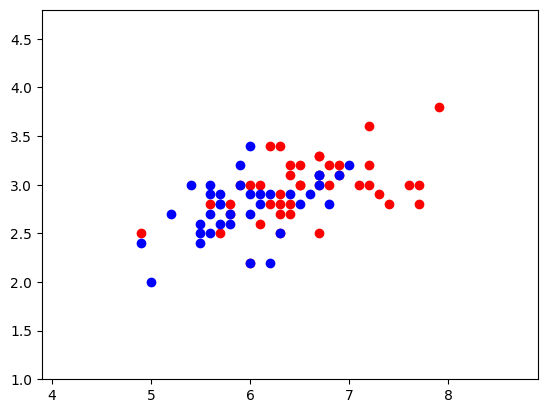

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


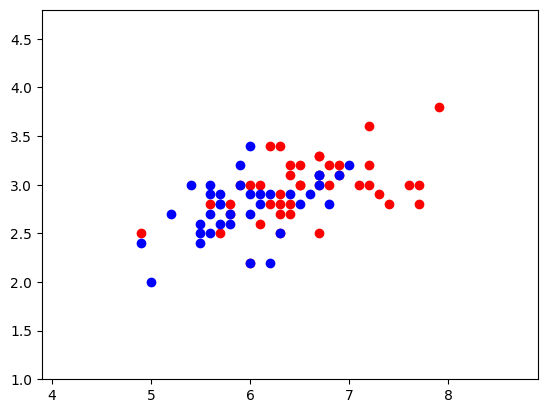

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


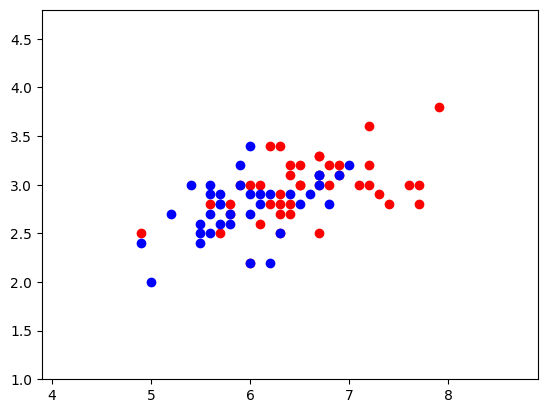

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


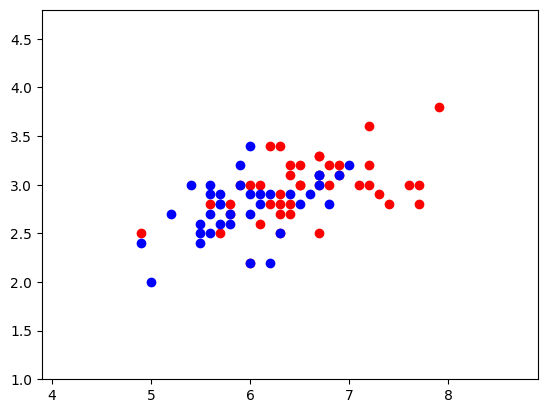

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


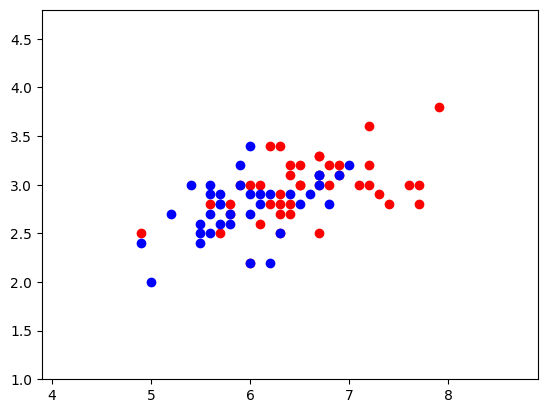

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


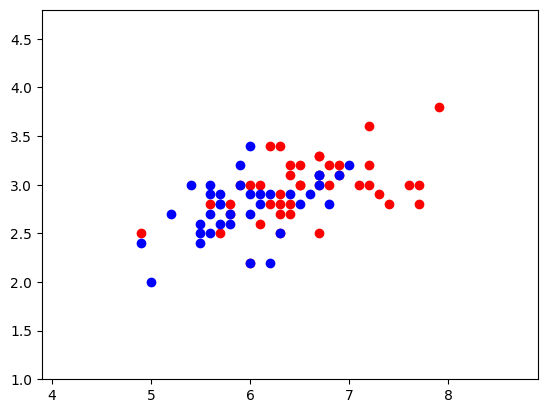

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


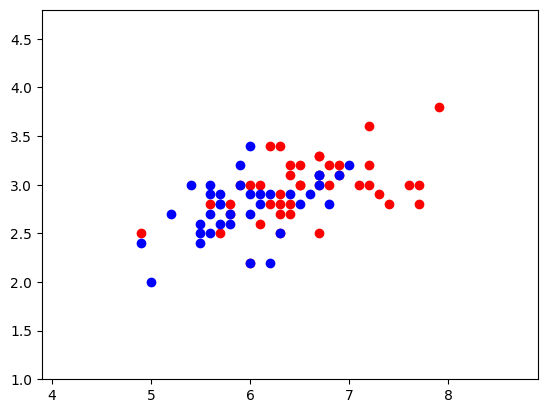

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


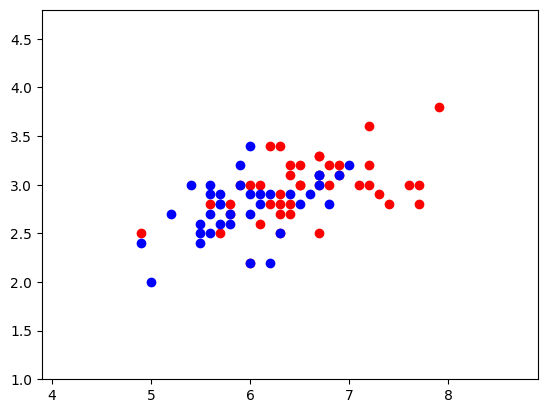

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


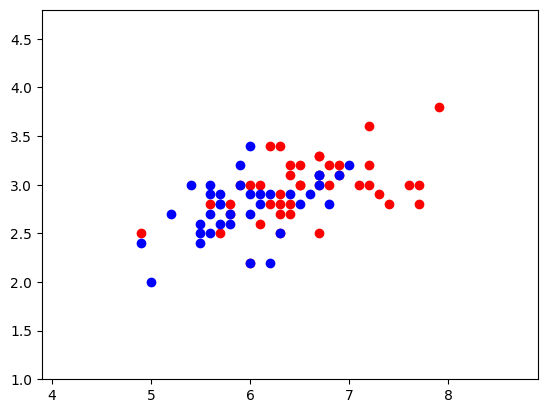

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


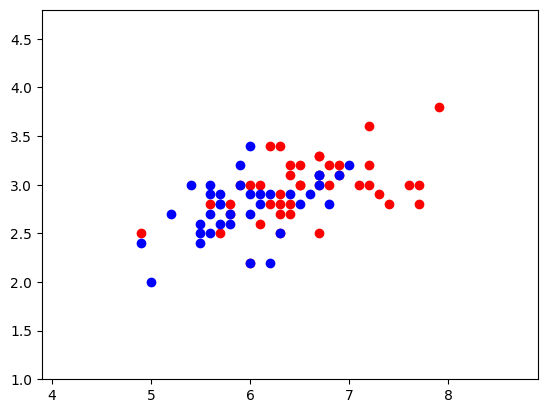

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


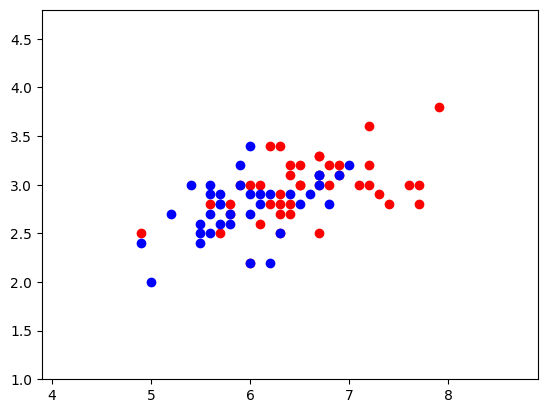

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


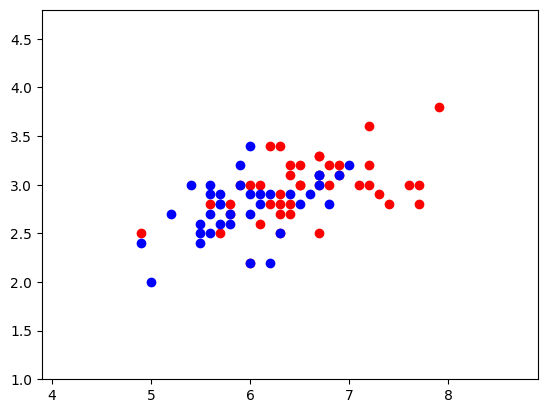

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


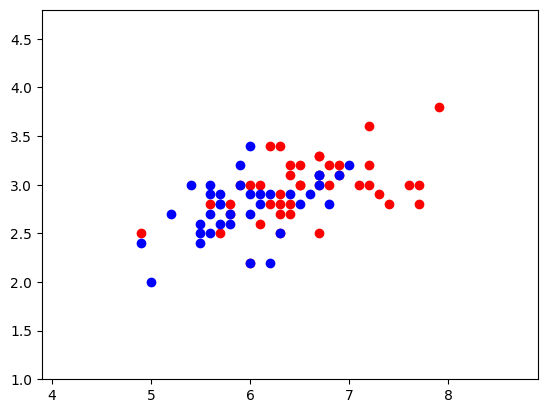

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


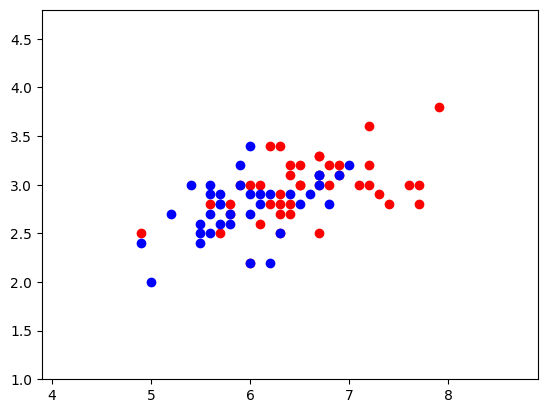

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


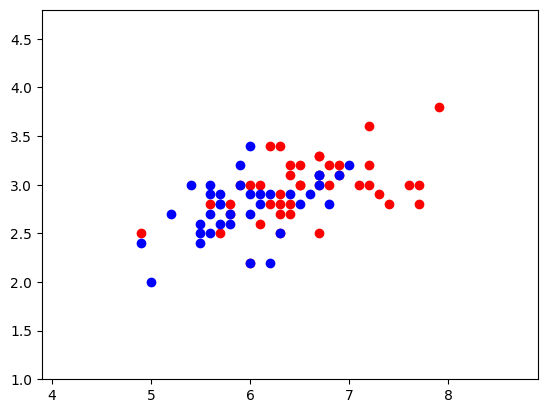

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


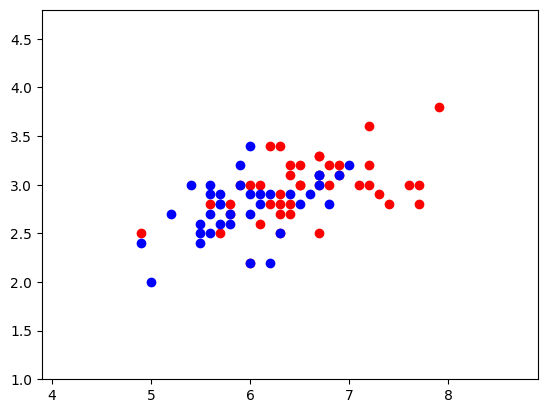

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


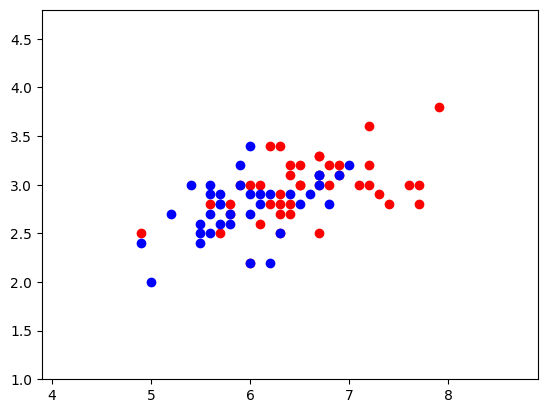

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


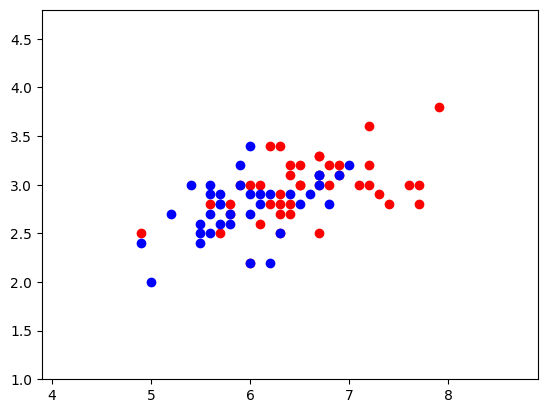

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


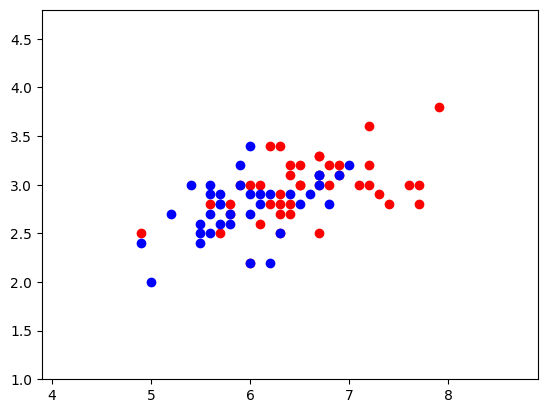

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


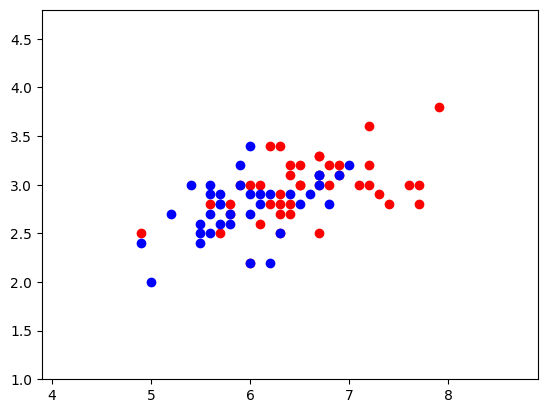

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


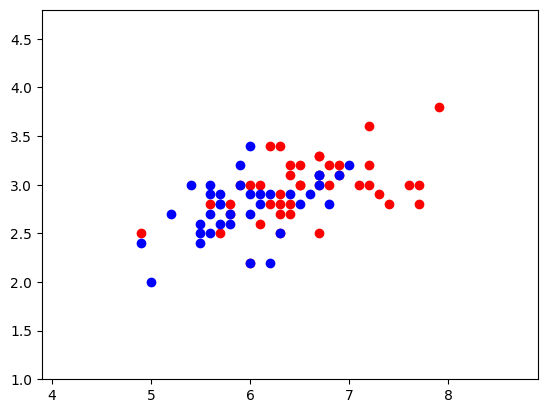

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


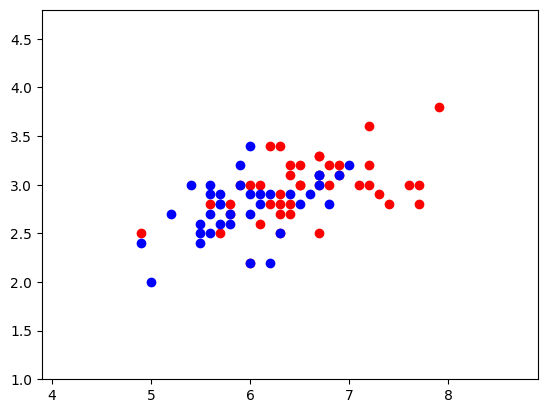

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


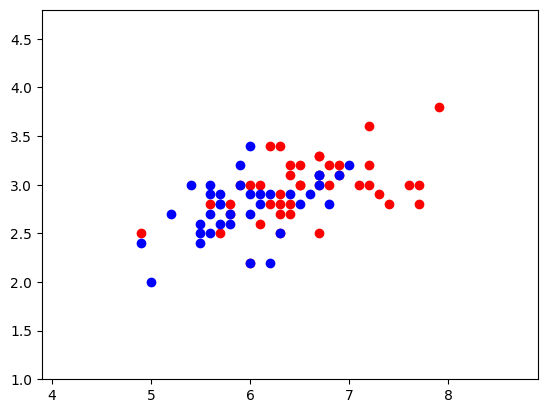

Bobot: [3.0, 9.700000000000003, 3.7000000000000015, -11.799999999999999, -10.500000000000002]


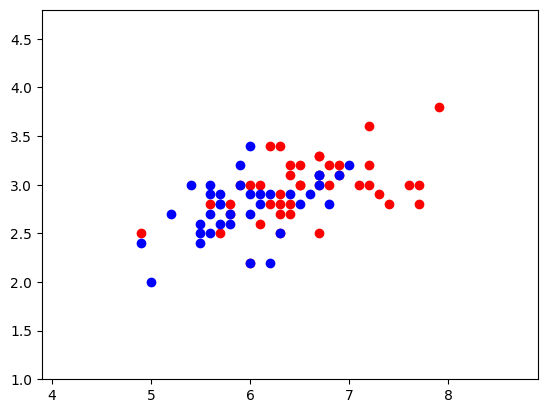

Bobot: [4.0, 15.100000000000003, 6.700000000000001, -7.299999999999999, -9.000000000000002]


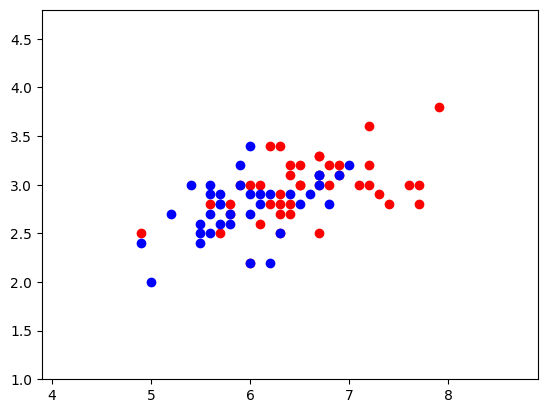

Bobot: [3.0, 7.900000000000003, 3.100000000000001, -13.399999999999999, -11.500000000000002]


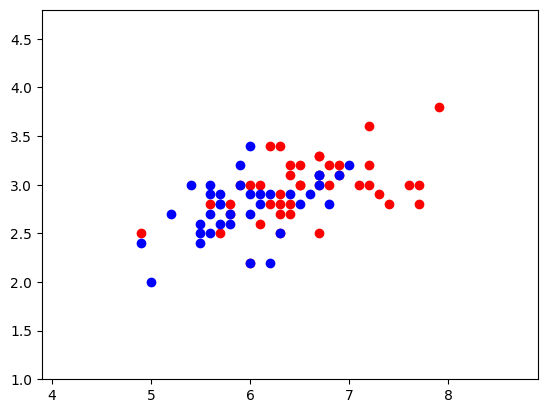

Bobot: [4.0, 13.600000000000003, 5.700000000000001, -9.899999999999999, -10.500000000000002]


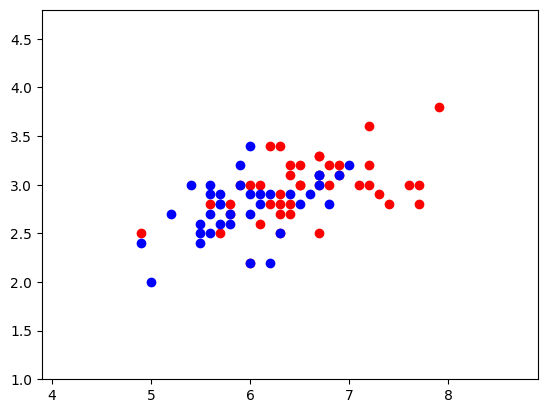

Bobot: [4.0, 13.600000000000003, 5.700000000000001, -9.899999999999999, -10.500000000000002]


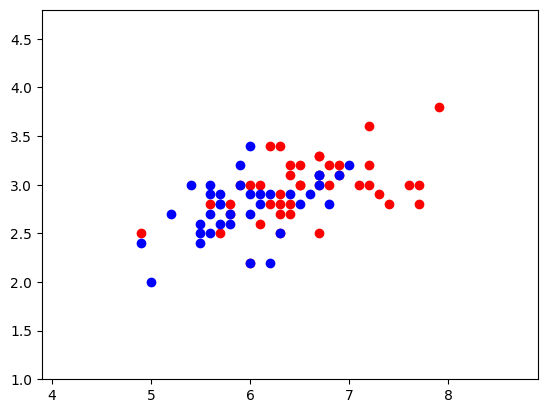

Bobot: [4.0, 13.600000000000003, 5.700000000000001, -9.899999999999999, -10.500000000000002]


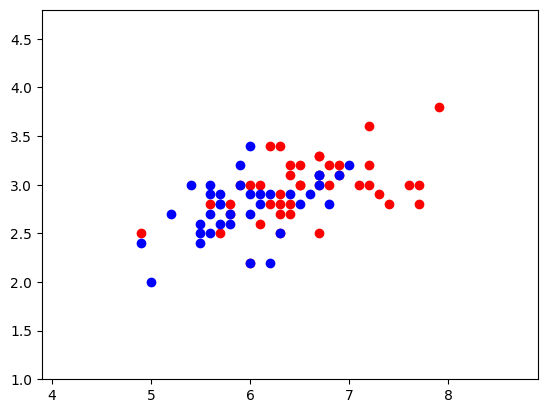

Bobot: [3.0, 6.900000000000003, 2.4000000000000012, -15.599999999999998, -13.000000000000002]


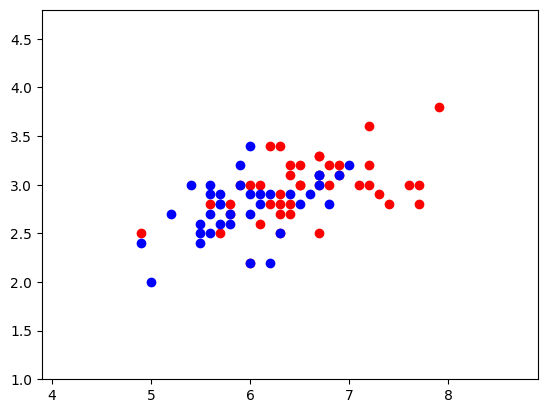

Bobot: [4.0, 12.900000000000002, 4.600000000000001, -11.599999999999998, -12.000000000000002]


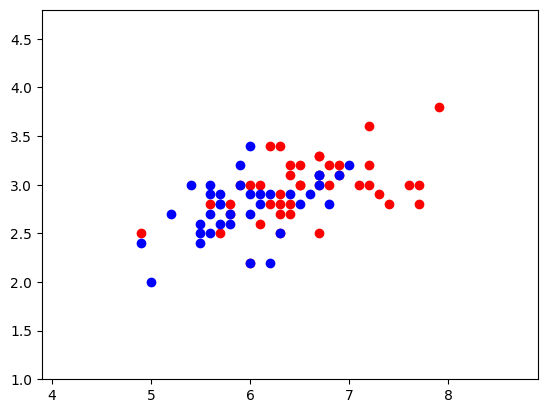

Bobot: [4.0, 12.900000000000002, 4.600000000000001, -11.599999999999998, -12.000000000000002]


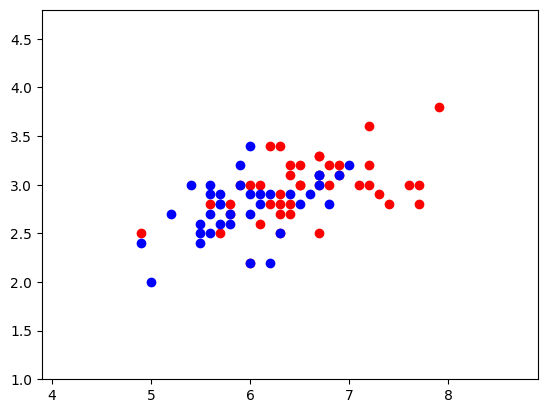

Bobot: [3.0, 7.100000000000002, 1.8000000000000016, -16.699999999999996, -14.400000000000002]


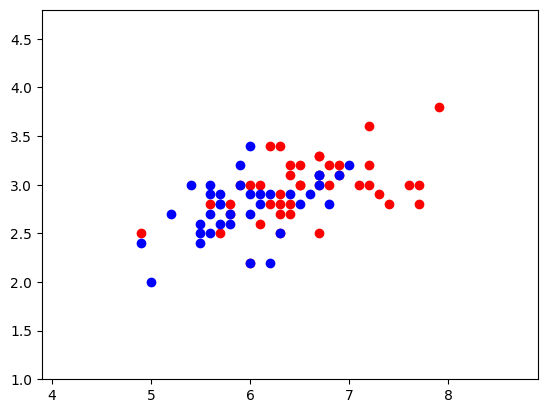

Bobot: [3.0, 7.100000000000002, 1.8000000000000016, -16.699999999999996, -14.400000000000002]


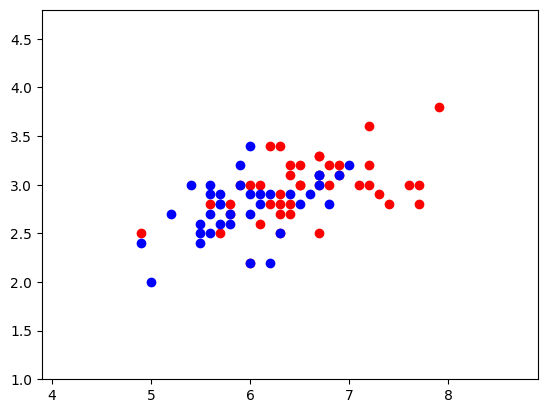

Bobot: [3.0, 7.100000000000002, 1.8000000000000016, -16.699999999999996, -14.400000000000002]


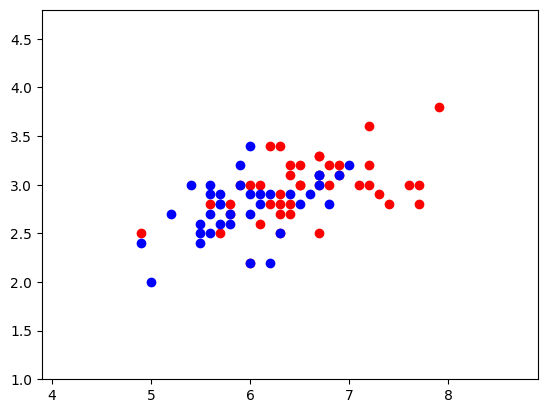

Bobot: [3.0, 7.100000000000002, 1.8000000000000016, -16.699999999999996, -14.400000000000002]


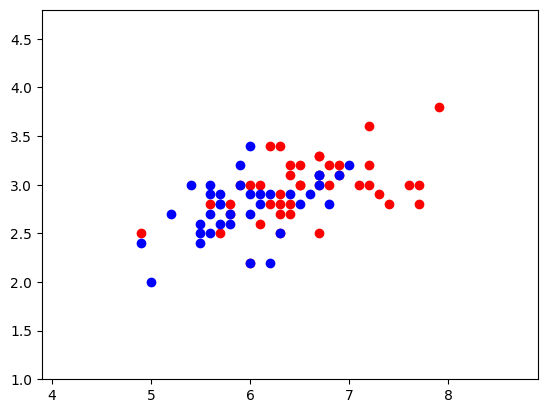

Bobot: [4.0, 13.600000000000001, 4.600000000000001, -12.099999999999996, -12.900000000000002]


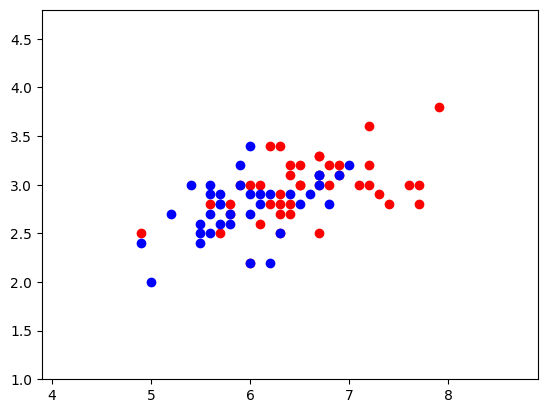

Bobot: [4.0, 13.600000000000001, 4.600000000000001, -12.099999999999996, -12.900000000000002]


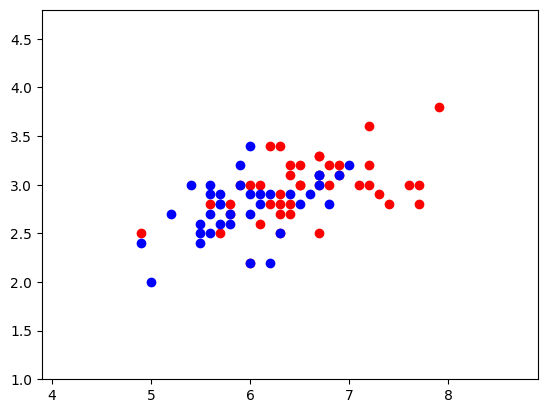

Bobot: [3.0, 7.500000000000002, 1.6000000000000014, -16.999999999999996, -14.700000000000003]


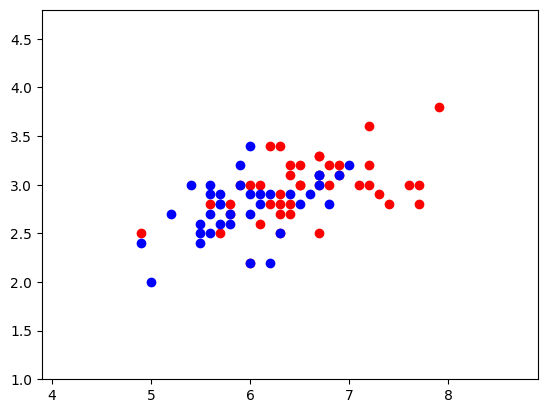

Bobot: [4.0, 12.700000000000003, 4.300000000000002, -13.099999999999996, -13.300000000000002]


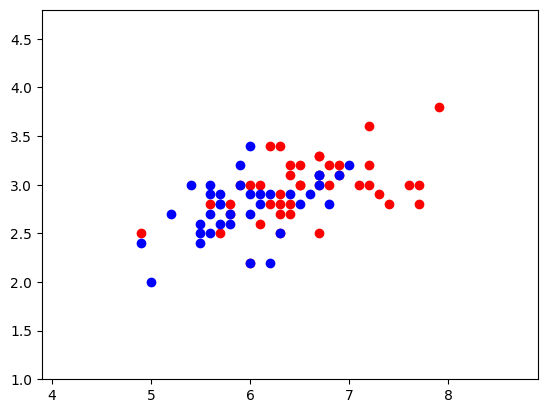

Bobot: [3.0, 5.500000000000003, 1.1000000000000014, -19.099999999999994, -15.100000000000003]


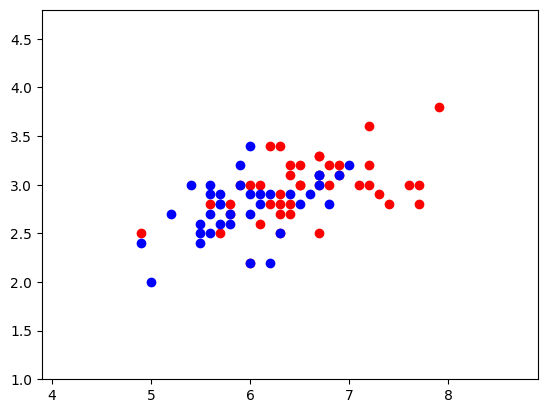

Bobot: [3.0, 5.500000000000003, 1.1000000000000014, -19.099999999999994, -15.100000000000003]


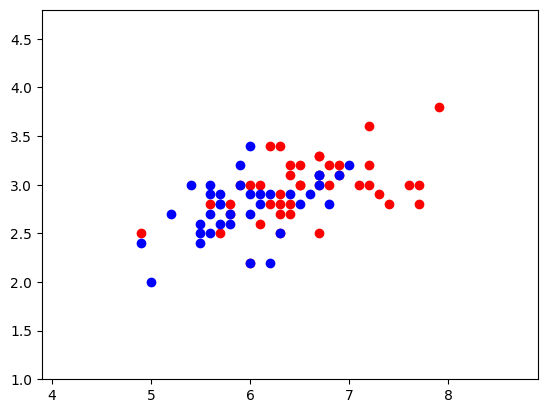

Bobot: [3.0, 5.500000000000003, 1.1000000000000014, -19.099999999999994, -15.100000000000003]


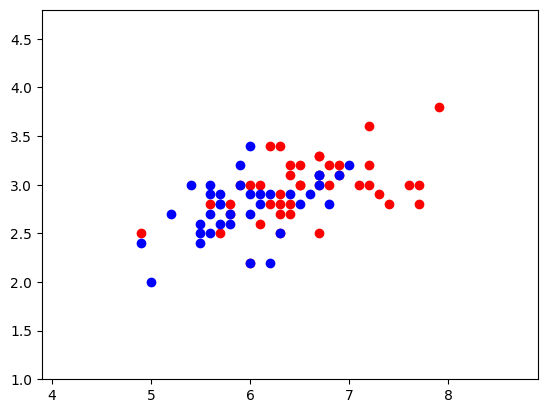

Bobot: [3.0, 5.500000000000003, 1.1000000000000014, -19.099999999999994, -15.100000000000003]


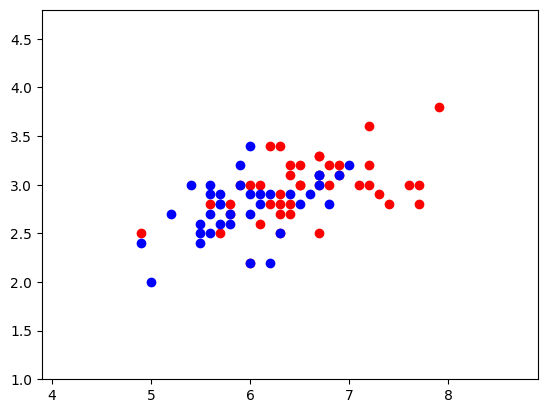

Bobot: [3.0, 5.500000000000003, 1.1000000000000014, -19.099999999999994, -15.100000000000003]


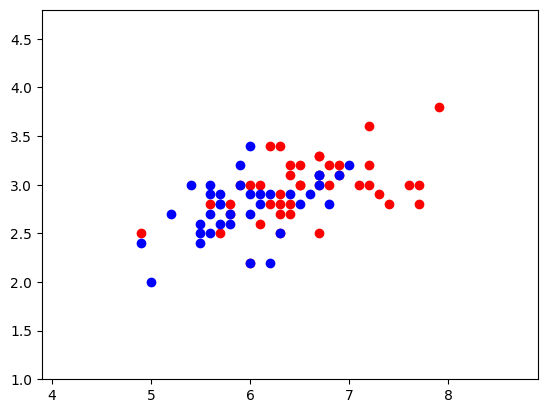

Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


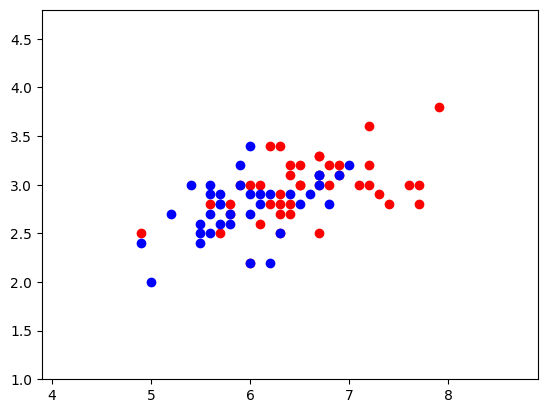

Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


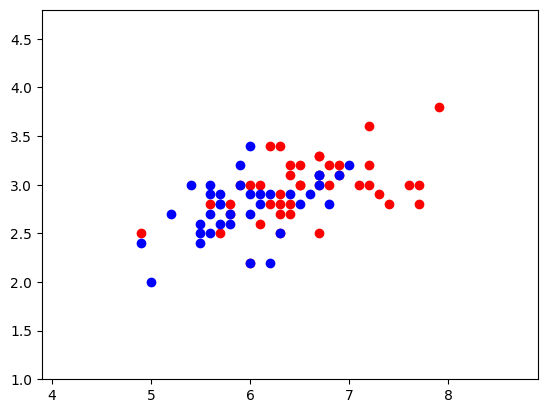


Epoch 3
Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


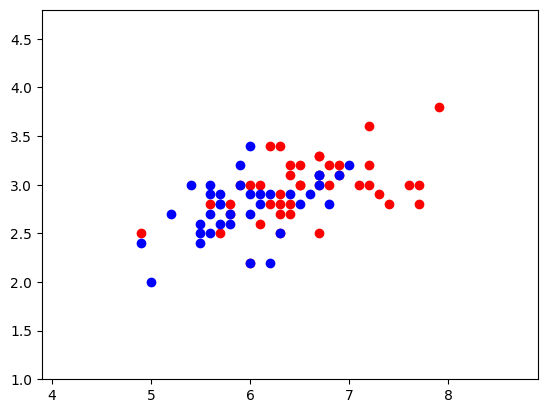

Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


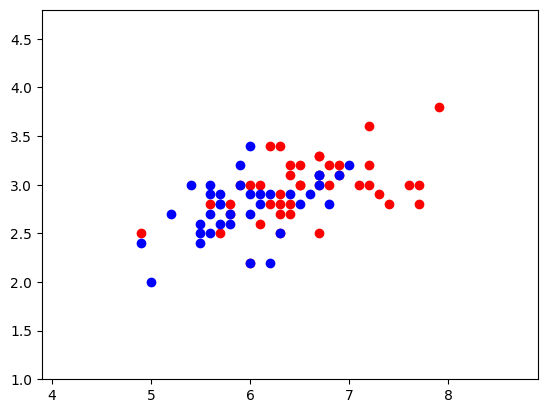

Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


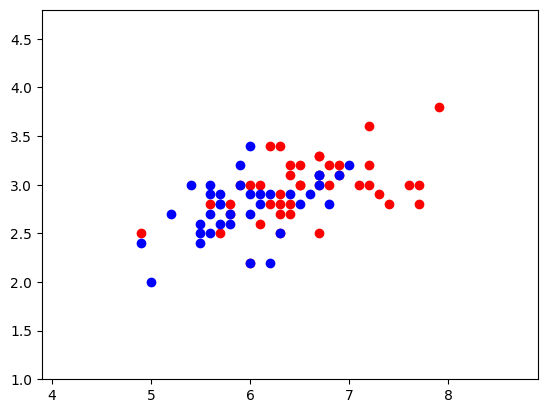

Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


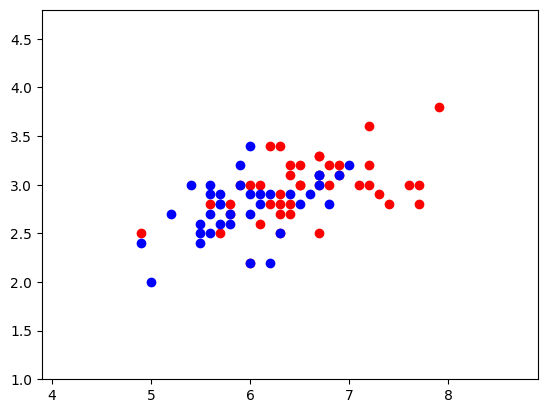

Bobot: [4.0, 11.400000000000002, 4.100000000000001, -14.899999999999995, -13.600000000000003]


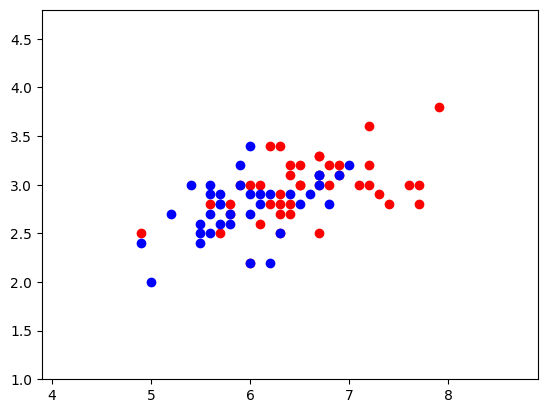

Bobot: [5.0, 17.5, 7.000000000000002, -10.199999999999996, -12.200000000000003]


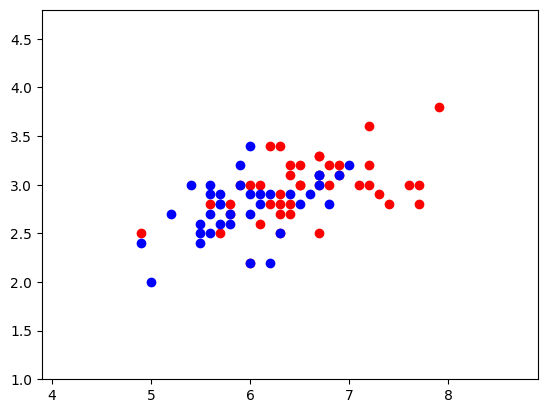

Bobot: [4.0, 11.1, 4.200000000000002, -15.799999999999995, -14.300000000000002]


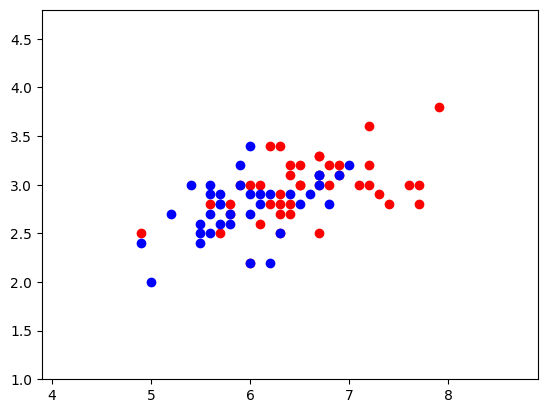

Bobot: [4.0, 11.1, 4.200000000000002, -15.799999999999995, -14.300000000000002]


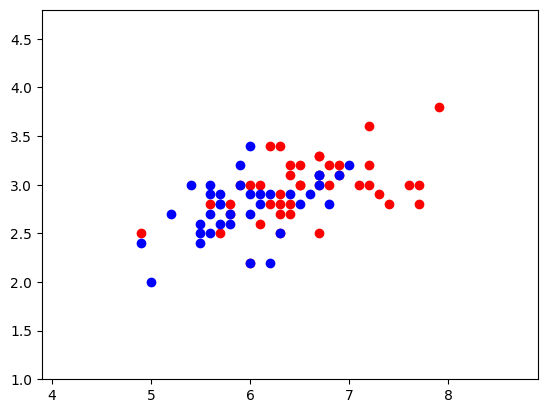

Bobot: [4.0, 11.1, 4.200000000000002, -15.799999999999995, -14.300000000000002]


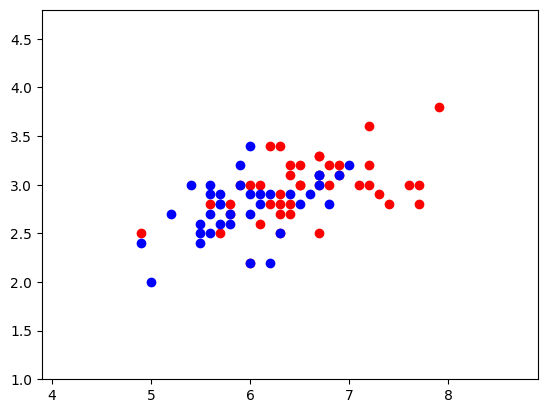

Bobot: [4.0, 11.1, 4.200000000000002, -15.799999999999995, -14.300000000000002]


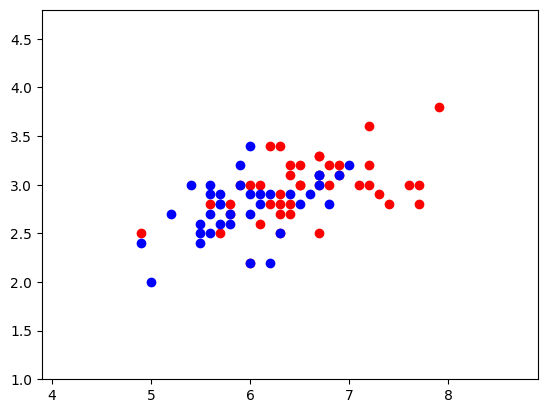

Bobot: [4.0, 11.1, 4.200000000000002, -15.799999999999995, -14.300000000000002]


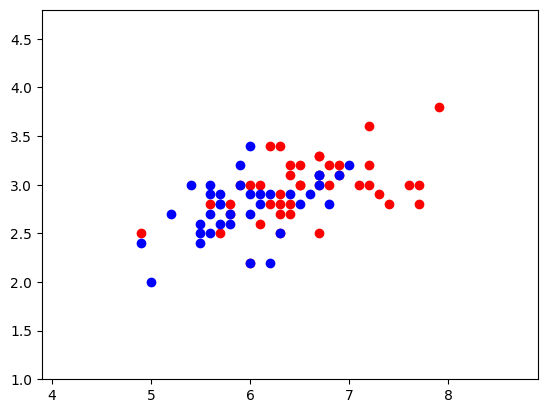

Bobot: [4.0, 11.1, 4.200000000000002, -15.799999999999995, -14.300000000000002]


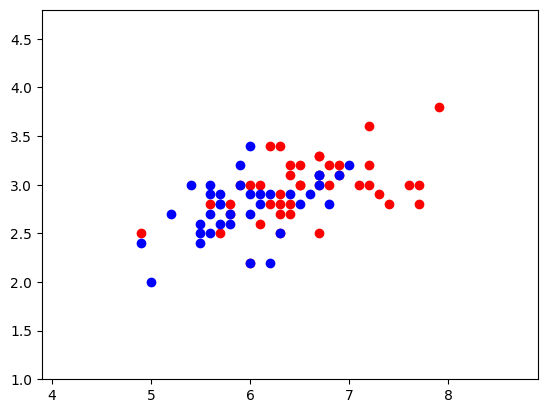

Bobot: [5.0, 17.2, 7.000000000000002, -11.099999999999994, -13.100000000000003]


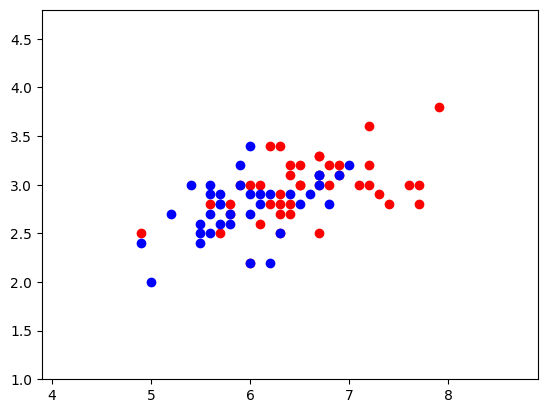

Bobot: [5.0, 17.2, 7.000000000000002, -11.099999999999994, -13.100000000000003]


KeyboardInterrupt: 

In [69]:
#nomor 3 dengan max_epoch tinggi
th = 0.2
a = 1
max_epoch = 1000000
model, epoch = percep_fit2(X_train, y_train, th, a, max_epoch, verbose=True, draw=True)
out = percep_predict(X_test, model)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -6.4, -2.7, -5.3, -1.9]


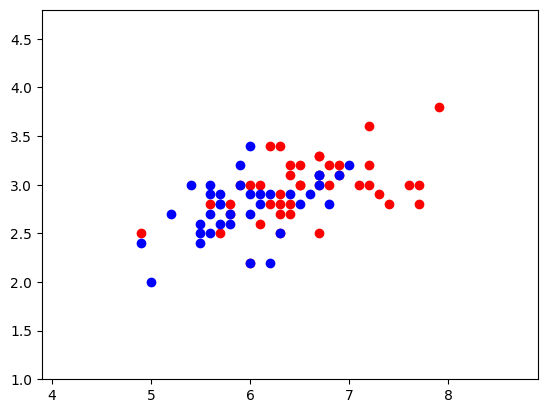

Bobot: [0.0, -0.20000000000000018, 0.19999999999999973, -1.0, -0.5999999999999999]


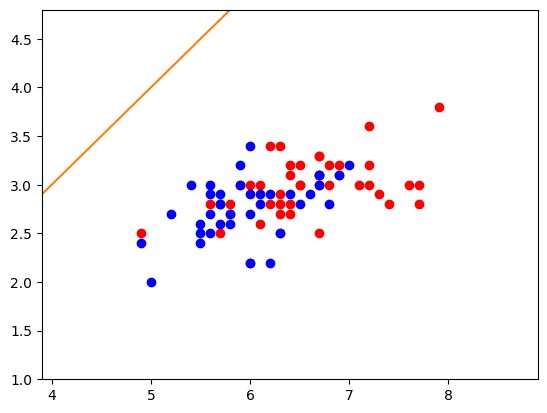

Bobot: [0.0, -0.20000000000000018, 0.19999999999999973, -1.0, -0.5999999999999999]


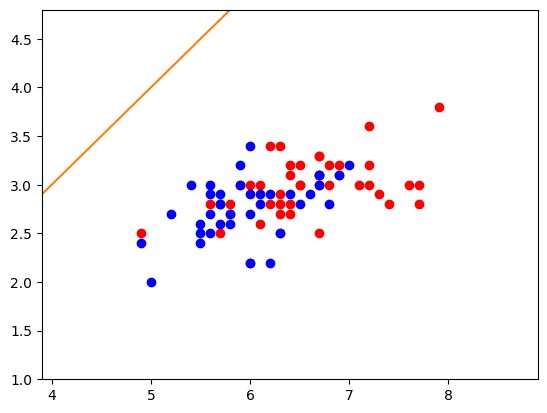

Bobot: [0.0, -0.20000000000000018, 0.19999999999999973, -1.0, -0.5999999999999999]


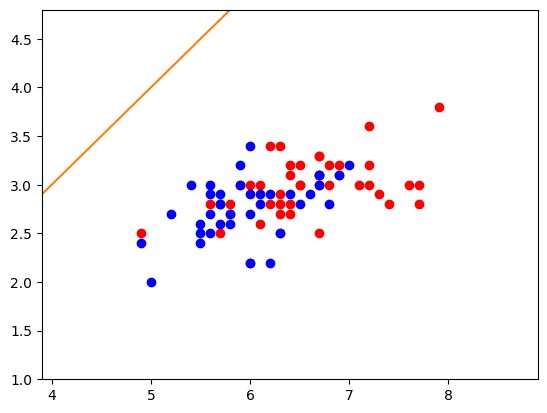

Bobot: [1.0, 6.7, 3.3, 3.9000000000000004, 0.9000000000000001]


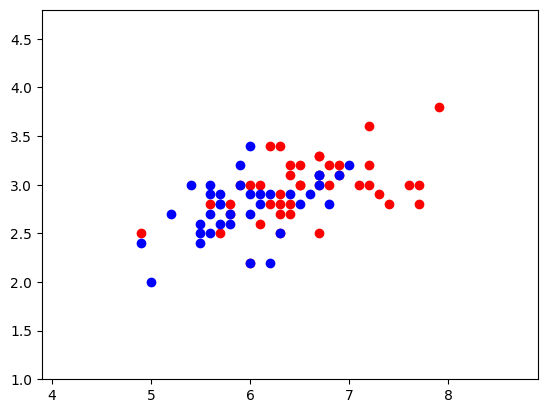

Bobot: [1.0, 6.7, 3.3, 3.9000000000000004, 0.9000000000000001]


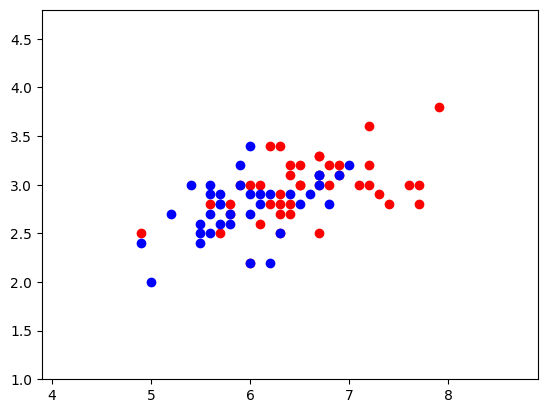

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


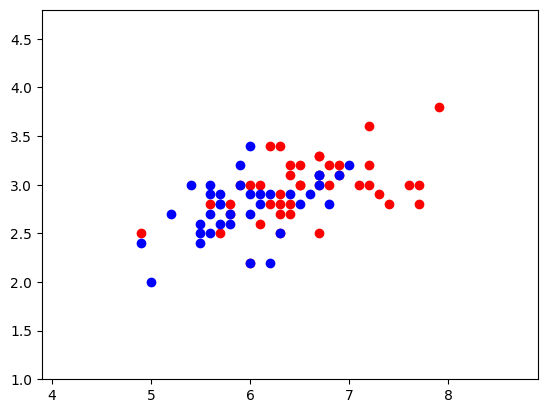

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


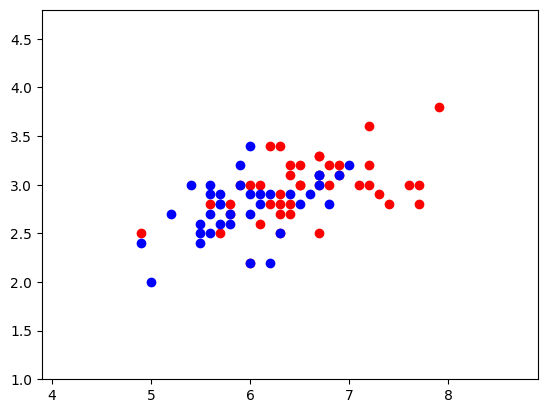

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


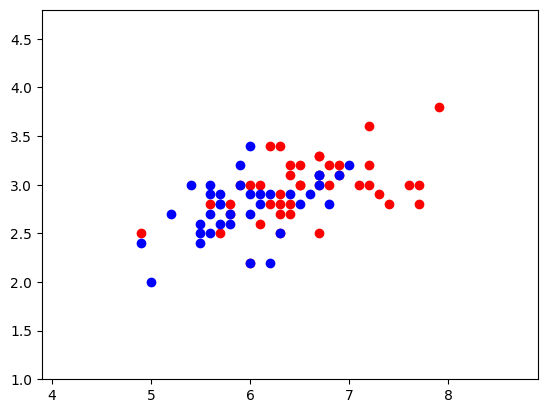

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


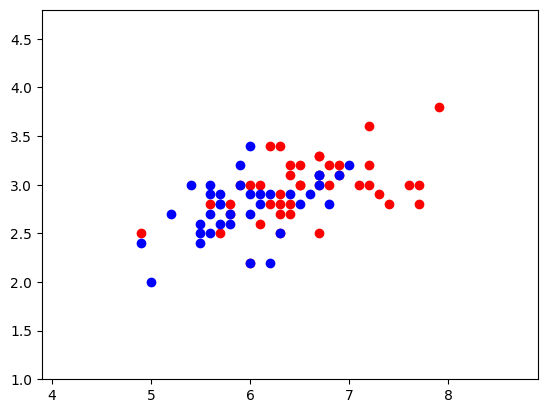

Bobot: [0.0, 0.2999999999999998, 0.5, -1.6999999999999993, -1.2]


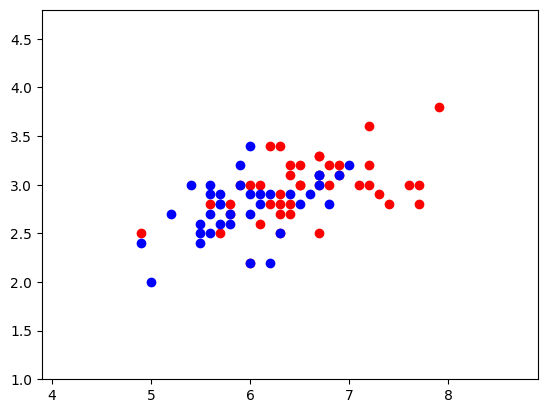

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


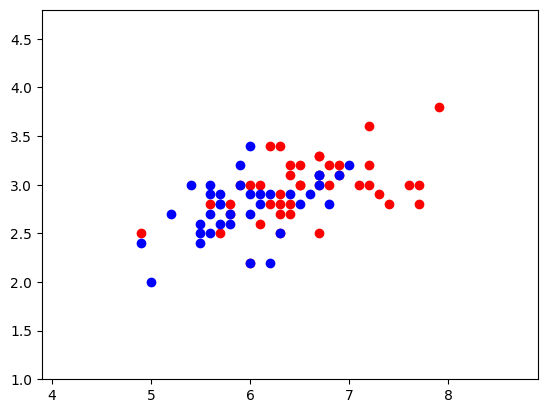

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


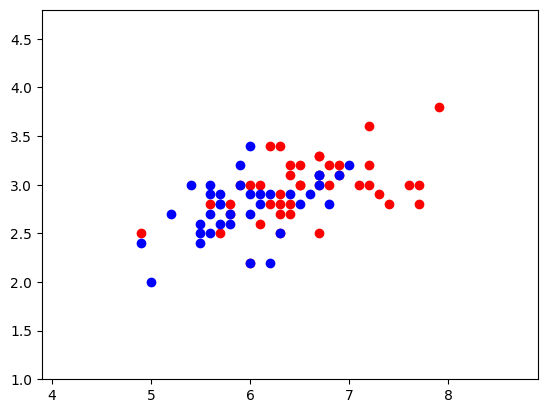

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


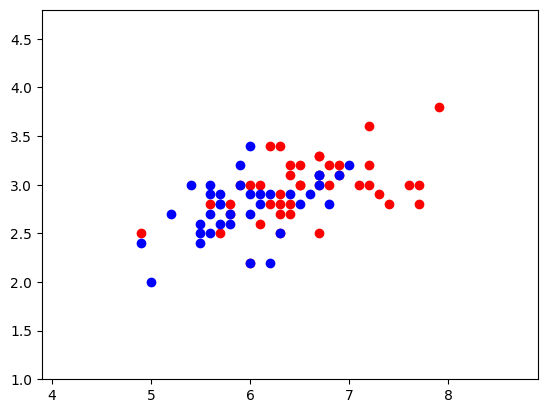

Bobot: [1.0, 5.8999999999999995, 3.4, 1.9000000000000008, 0.10000000000000009]


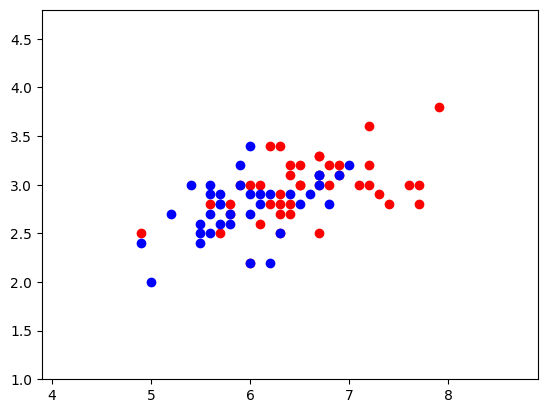

Bobot: [0.0, 0.2999999999999998, 0.6000000000000001, -2.9999999999999996, -1.9]


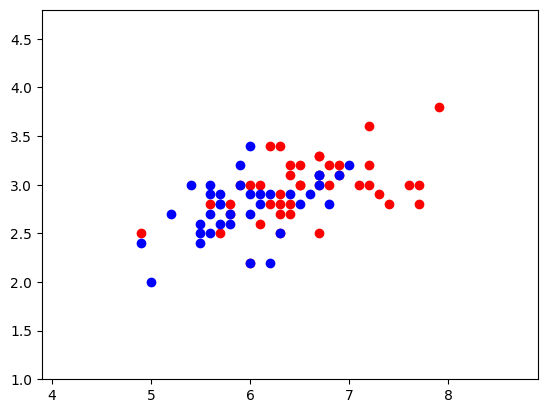

Bobot: [1.0, 7.0, 3.6, 2.0000000000000004, -0.19999999999999996]


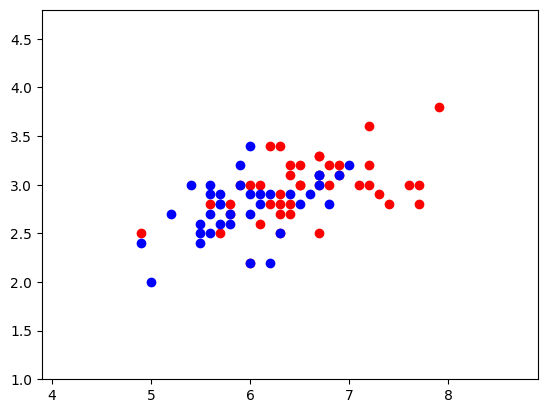

Bobot: [1.0, 7.0, 3.6, 2.0000000000000004, -0.19999999999999996]


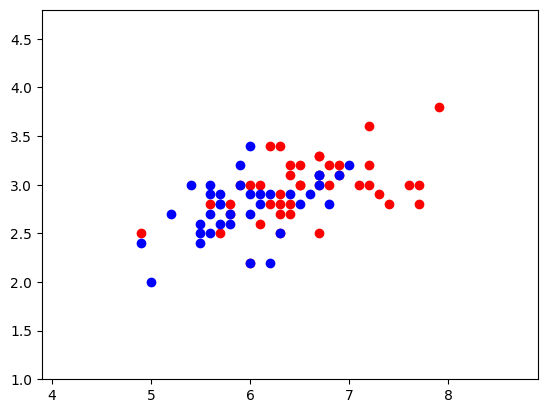

Bobot: [0.0, 0.5999999999999996, 0.3999999999999999, -3.2999999999999994, -2.5]


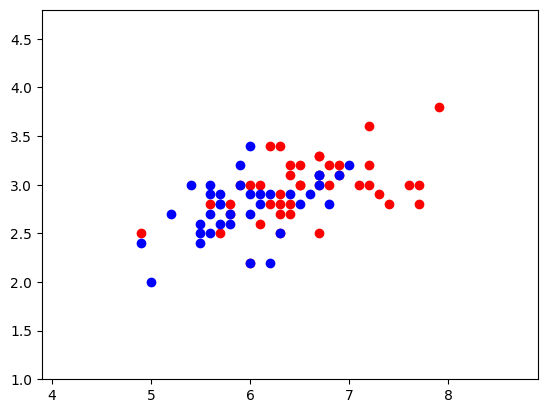

Bobot: [1.0, 6.1, 2.8, 0.5000000000000004, -1.4]


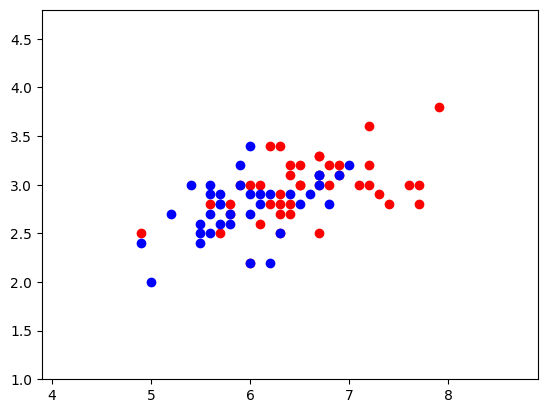

Bobot: [1.0, 6.1, 2.8, 0.5000000000000004, -1.4]


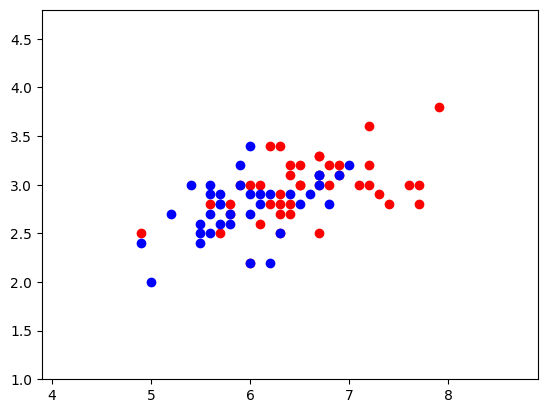

Bobot: [0.0, -0.6000000000000005, -0.5, -5.199999999999999, -3.5]


KeyboardInterrupt: 

In [70]:
#nomor 3 dengan max_epoch rendah
th = 0.2
a = 1
max_epoch = 1
model, epoch = percep_fit2(X_train, y_train, th, a, max_epoch, verbose=True, draw=True)
out = percep_predict(X_test, model)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)